In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import joblib

In [2]:
data=pd.read_csv('train.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [5]:
df.tail()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84
21262,3,87.468333,86.858500,82.555758,80.458722,1.041270,0.895229,71.75500,43.144000,29.905282,...,4.500000,4.762203,4.242641,1.054920,0.970116,3,1.800000,1.414214,1.500000,12.80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
range_Valence,21263.0,2.041010,1.242345,0.000000,1.000000,2.000000,3.000000,6.0000
wtd_range_Valence,21263.0,1.483007,0.978176,0.000000,0.921454,1.063077,1.918400,6.9922
std_Valence,21263.0,0.839342,0.484676,0.000000,0.451754,0.800000,1.200000,3.0000
wtd_std_Valence,21263.0,0.673987,0.455580,0.000000,0.306892,0.500000,1.020436,3.0000


In [15]:
df.shape

(21263, 82)

In [17]:
df.duplicated().sum()

66

In [19]:
df1=df.drop_duplicates()

In [21]:
df1.shape

(21197, 82)

In [23]:
df1.isnull().sum()

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64

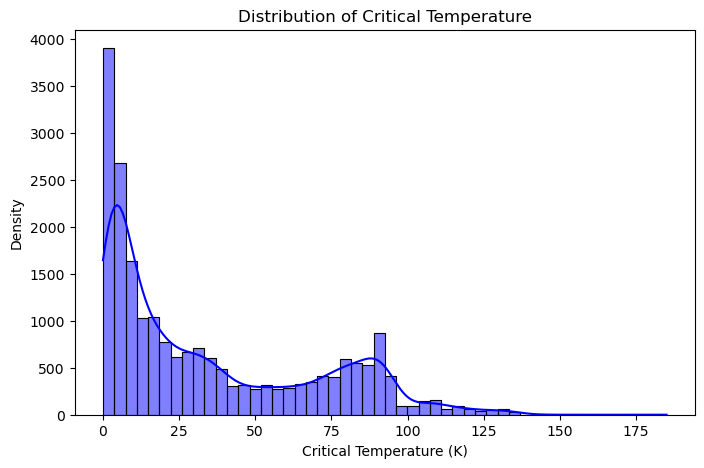

In [25]:
# Distribution of Target Variable
plt.figure(figsize=(8, 5))
sns.histplot(df1['critical_temp'], bins=50, kde=True, color='blue')
plt.xlabel("Critical Temperature (K)")
plt.ylabel("Density")
plt.title("Distribution of Critical Temperature")
plt.show()

In [27]:
num_columns=df1.select_dtypes('number')

In [29]:
num_columns

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


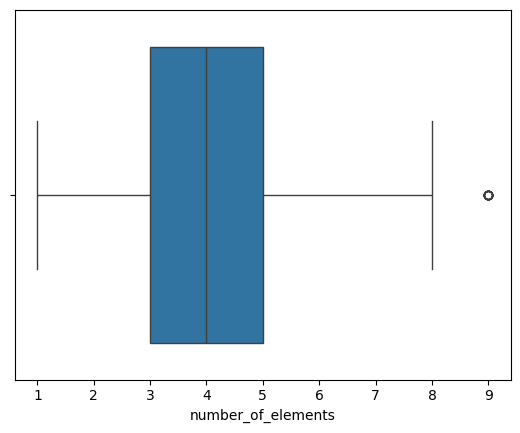

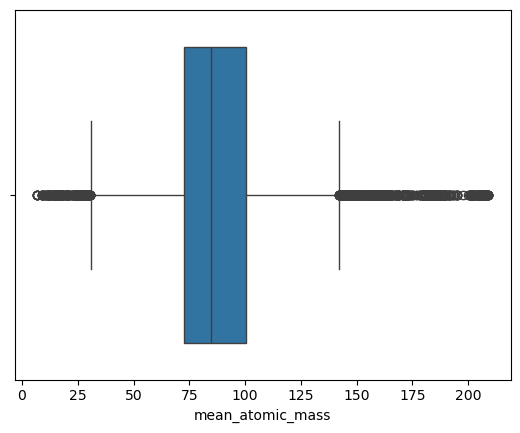

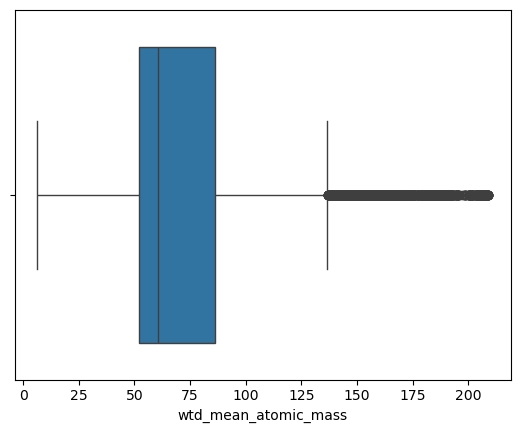

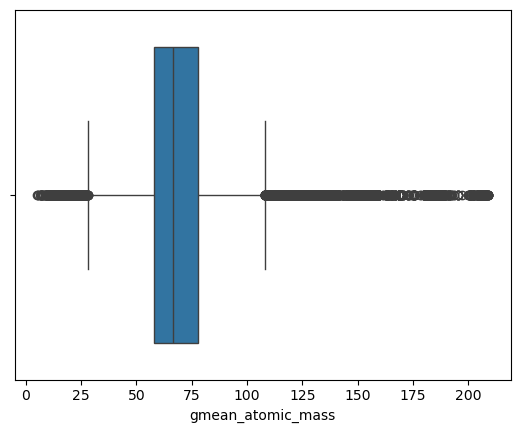

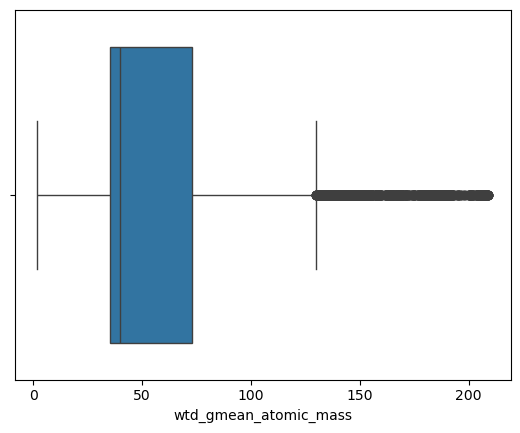

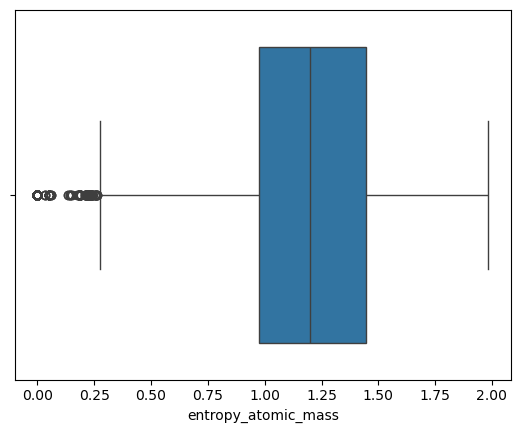

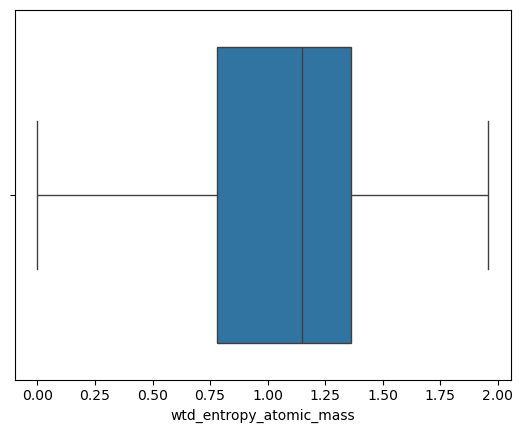

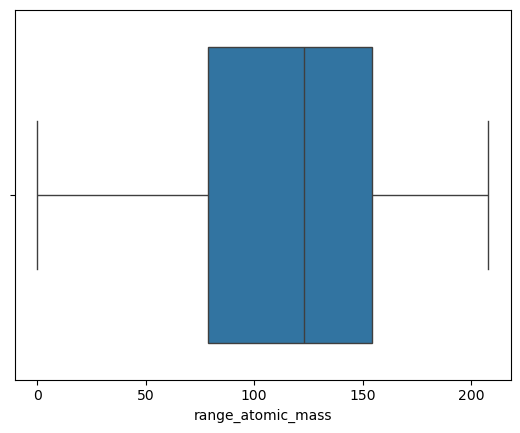

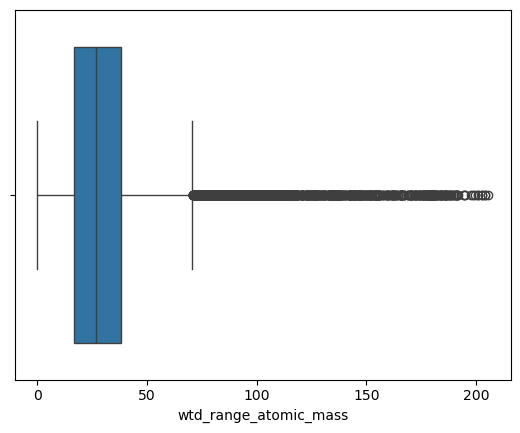

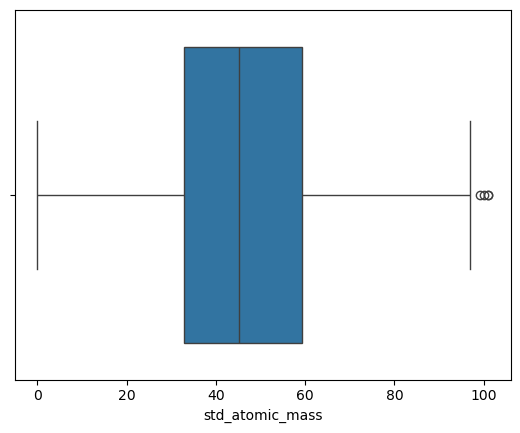

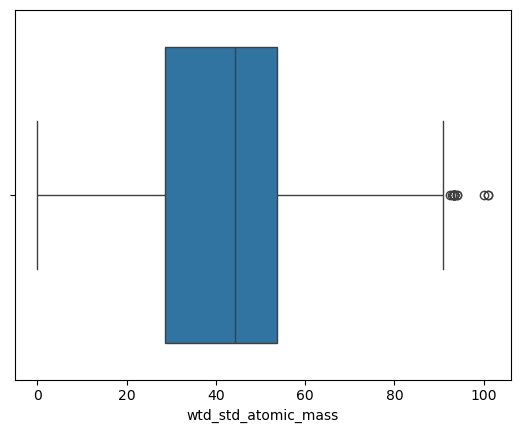

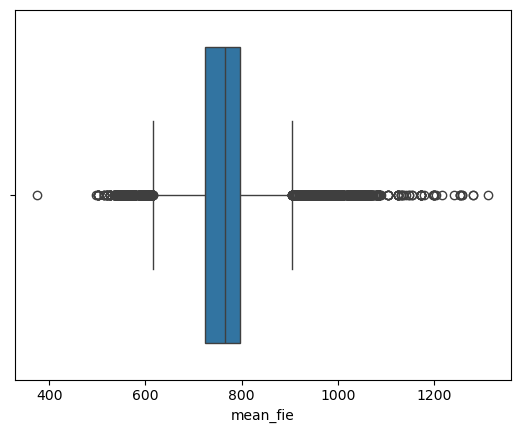

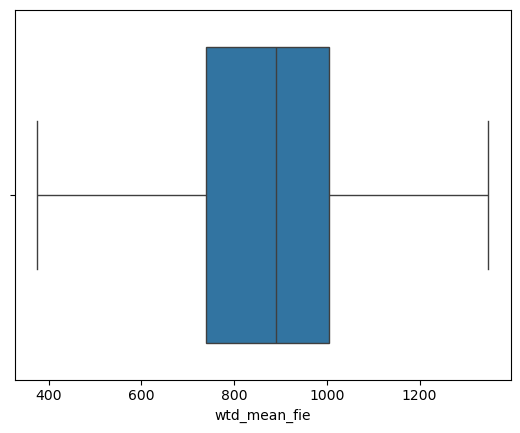

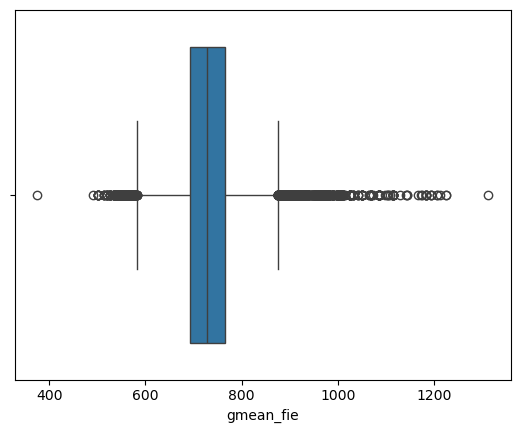

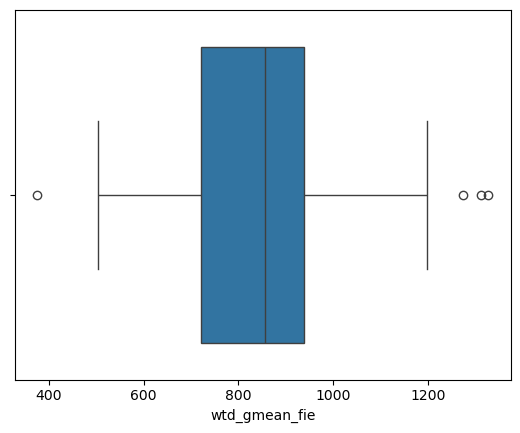

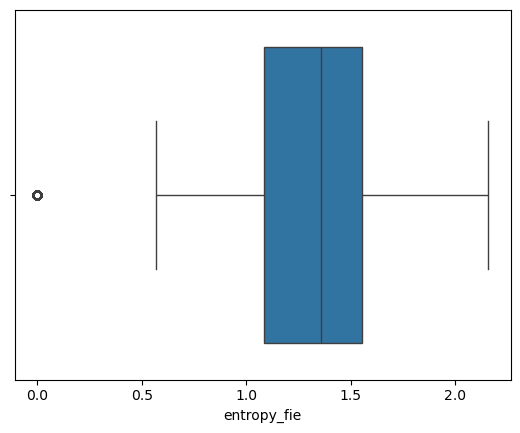

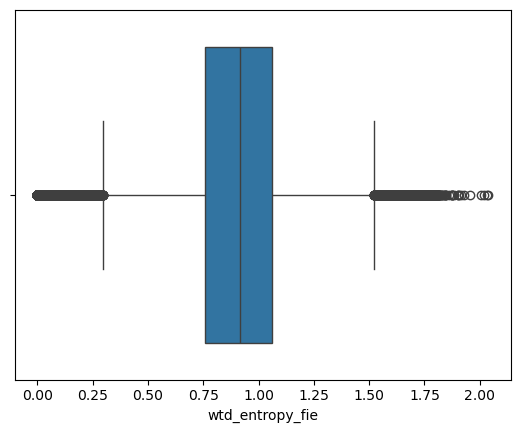

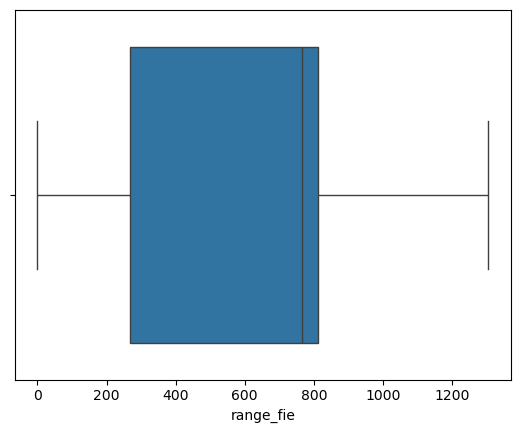

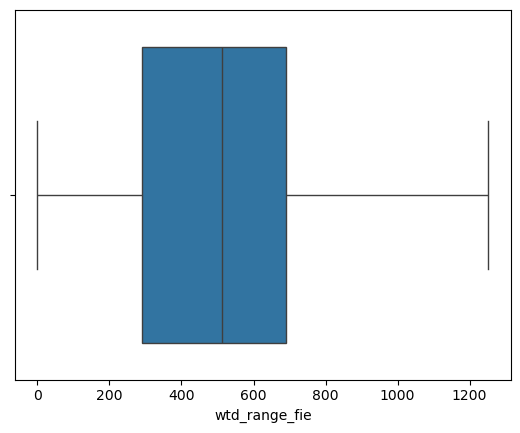

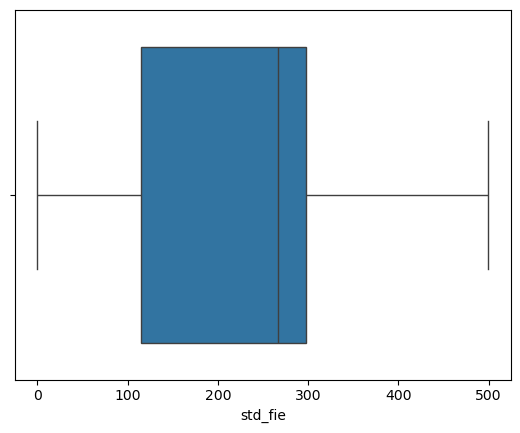

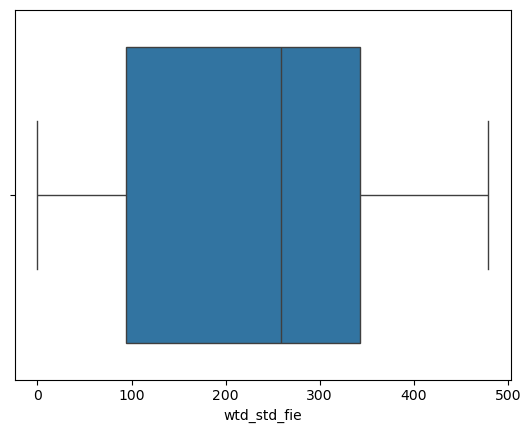

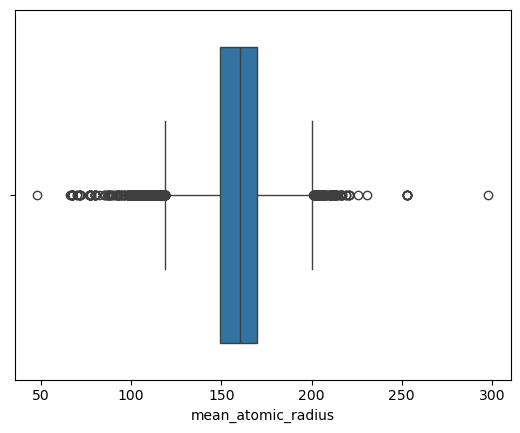

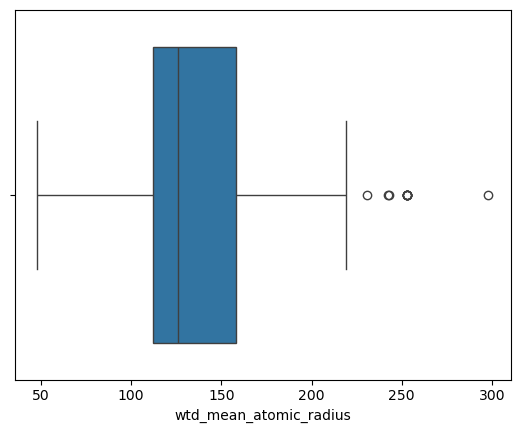

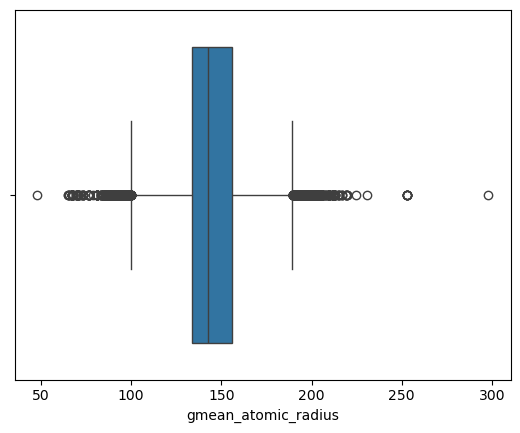

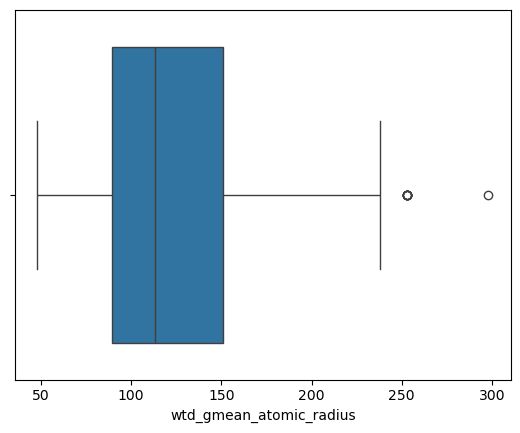

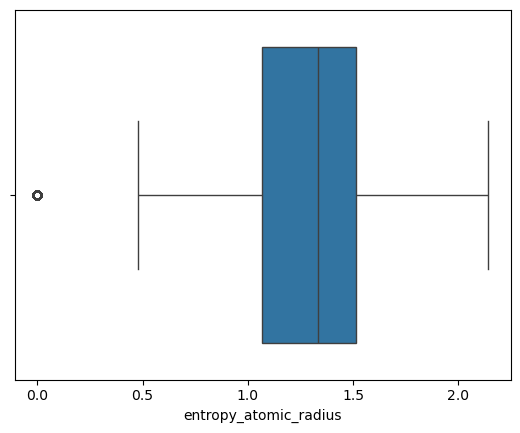

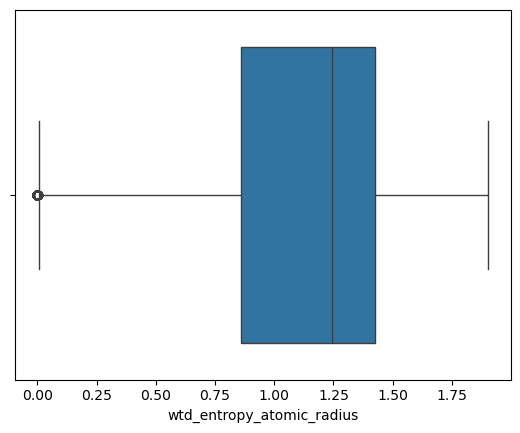

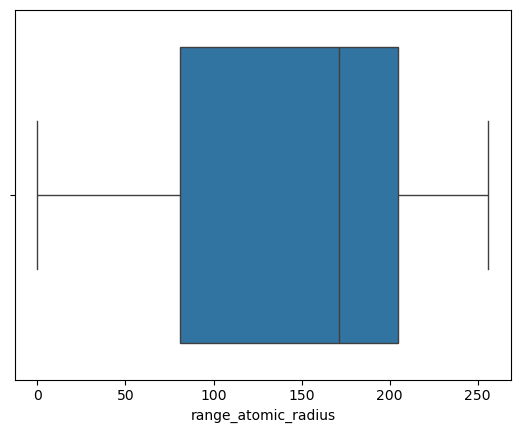

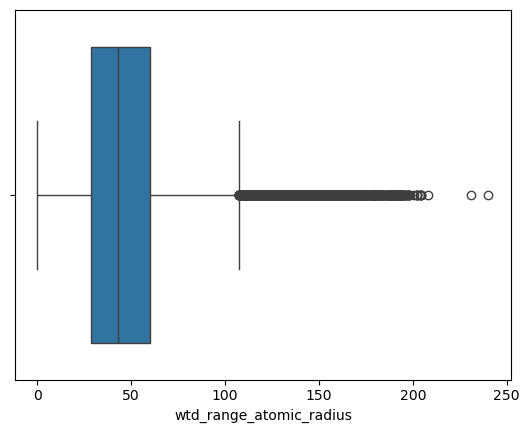

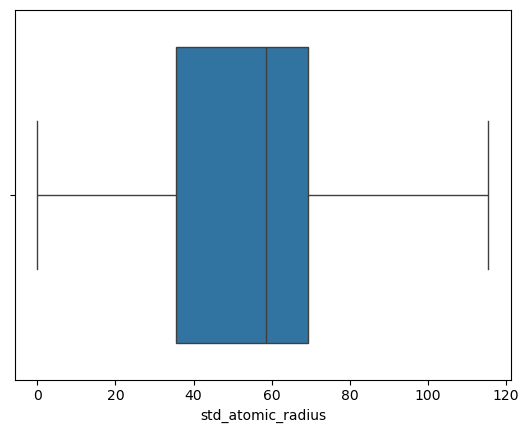

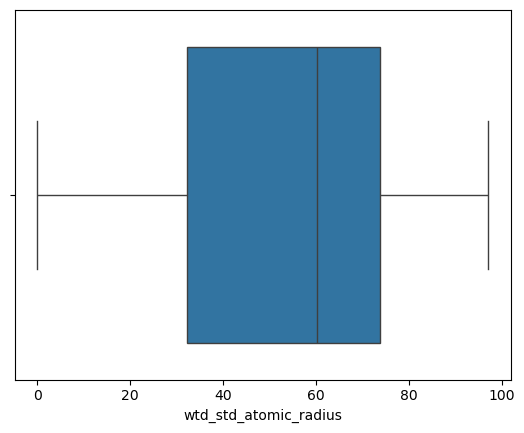

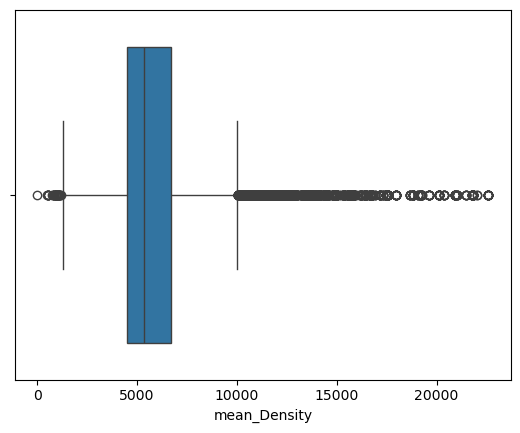

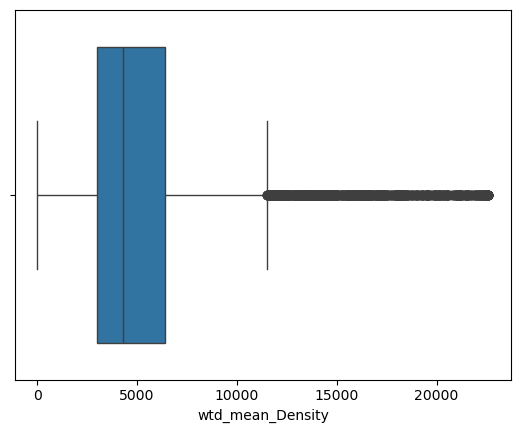

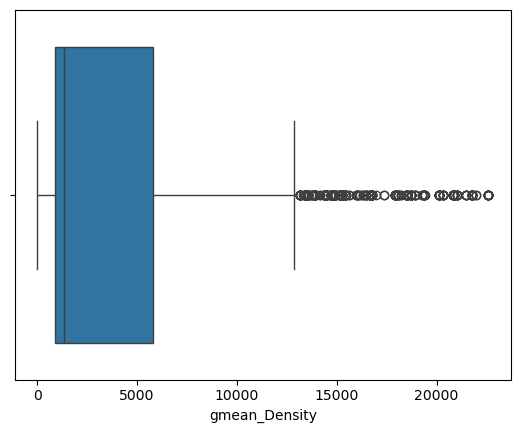

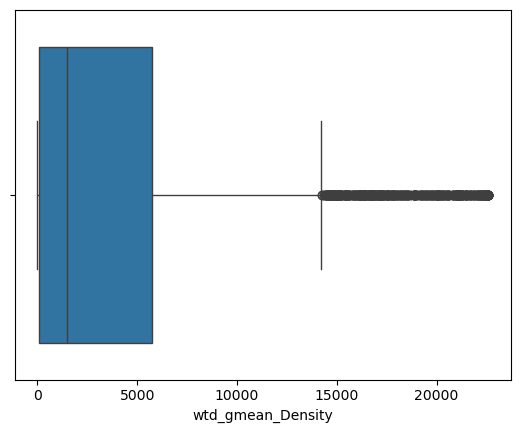

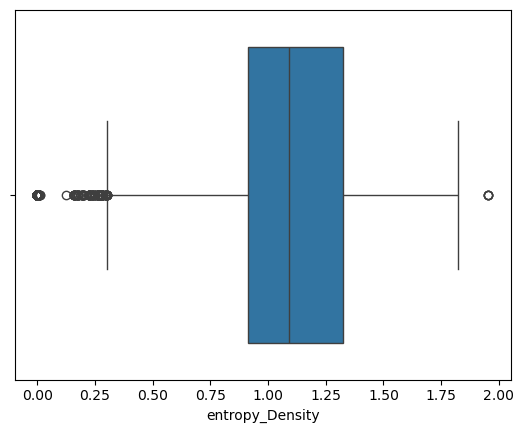

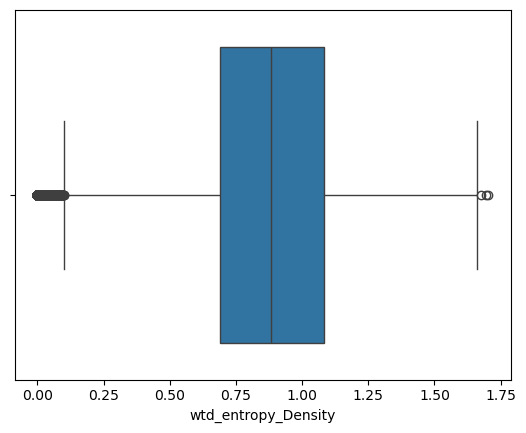

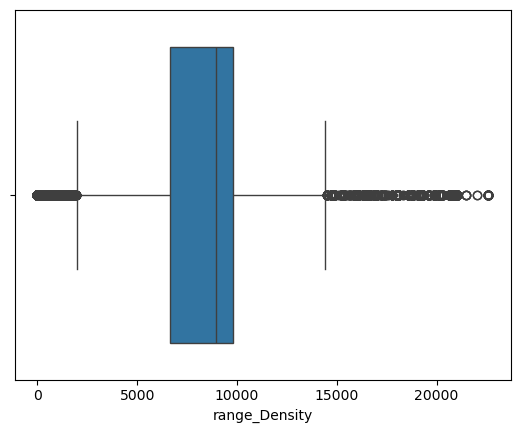

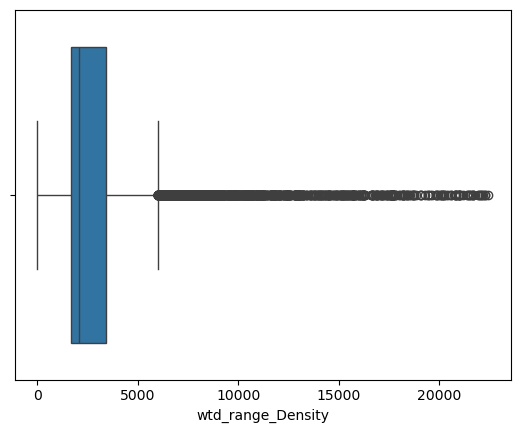

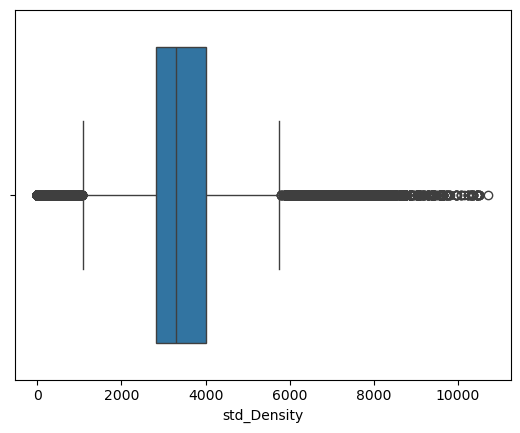

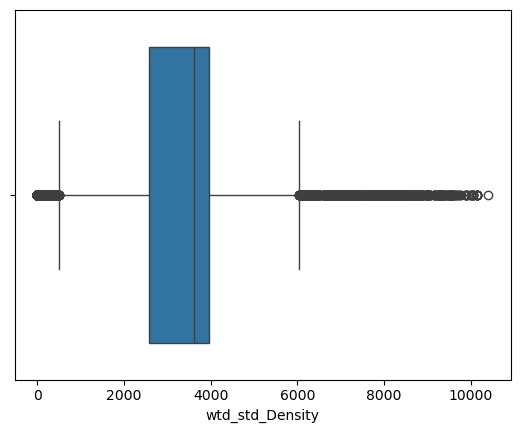

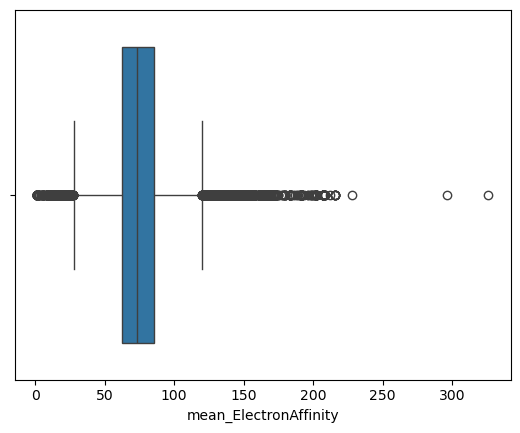

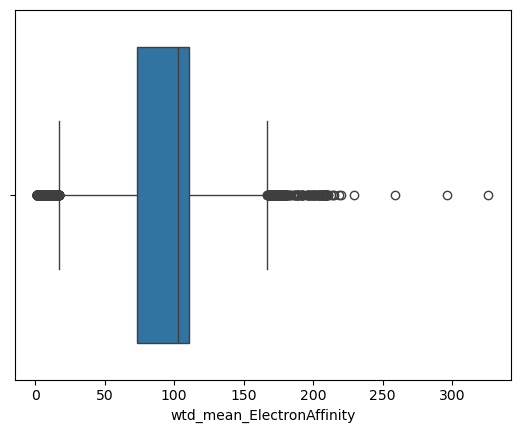

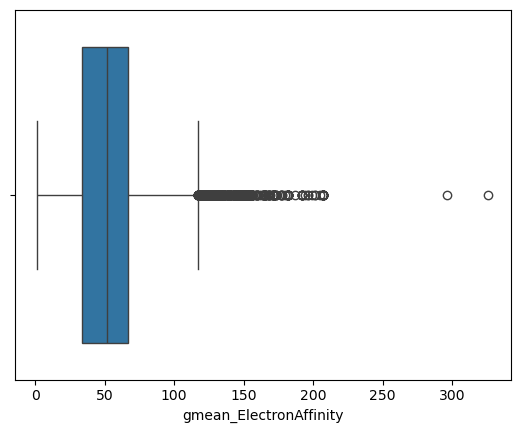

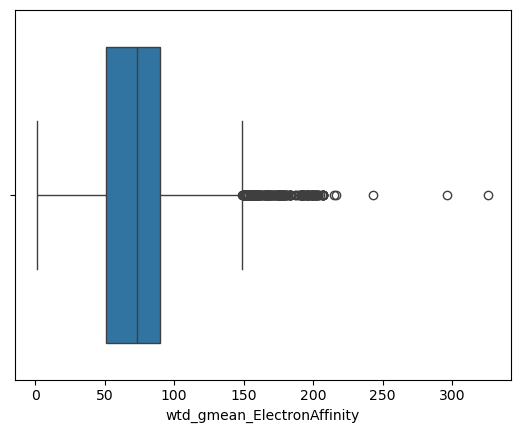

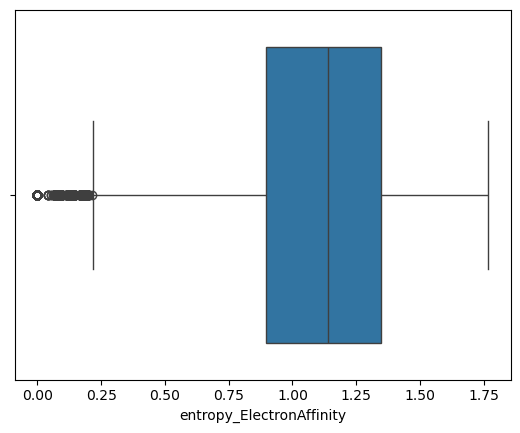

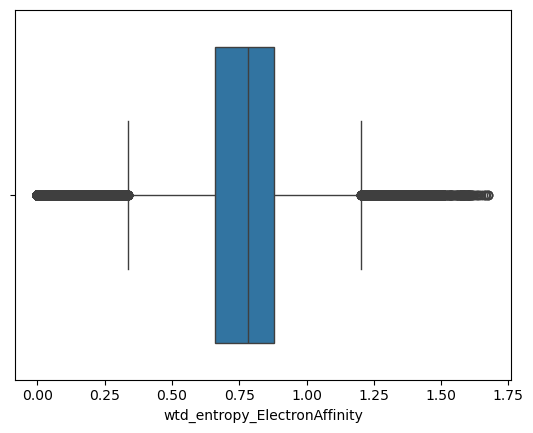

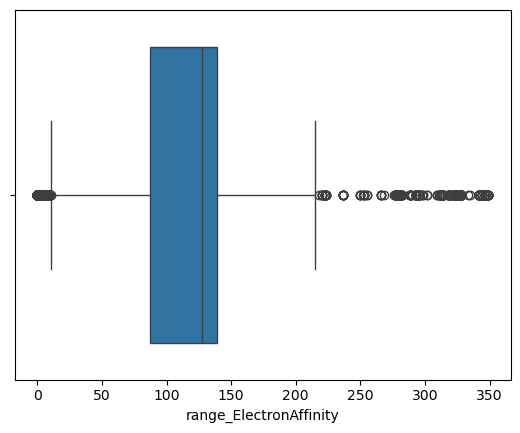

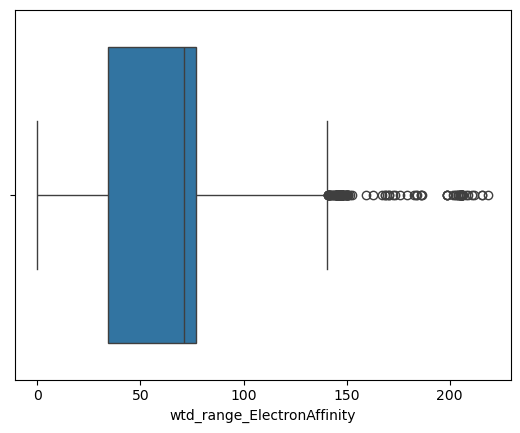

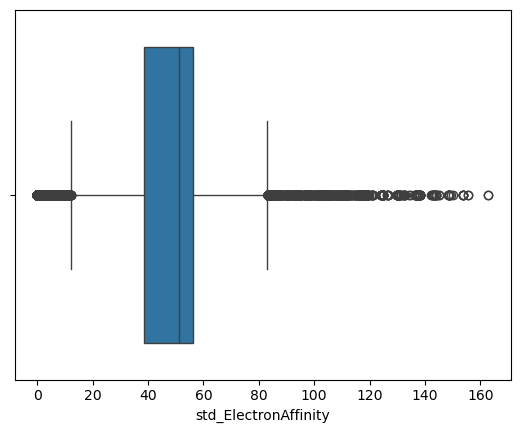

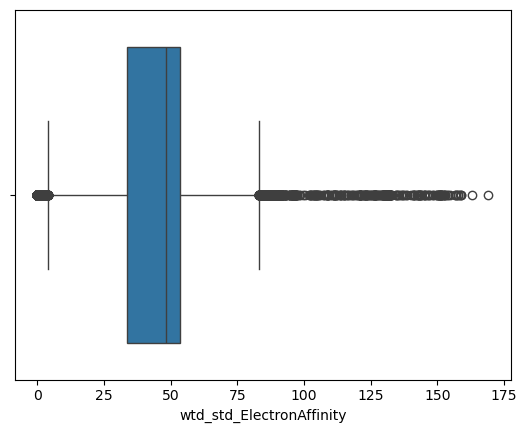

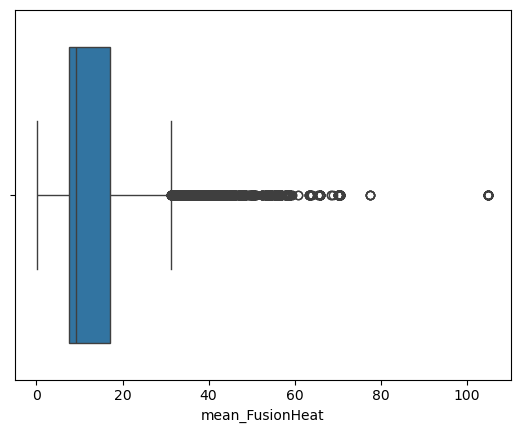

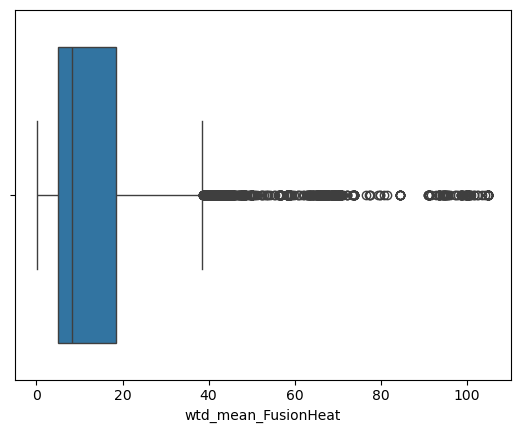

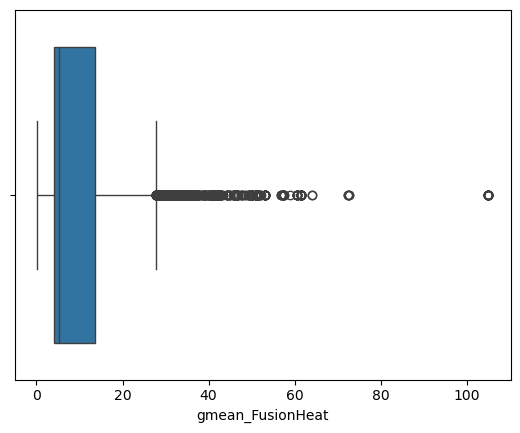

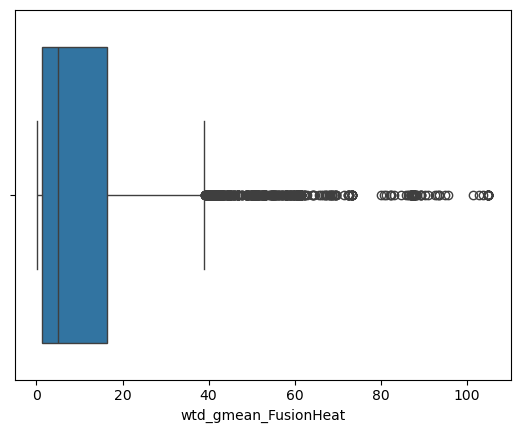

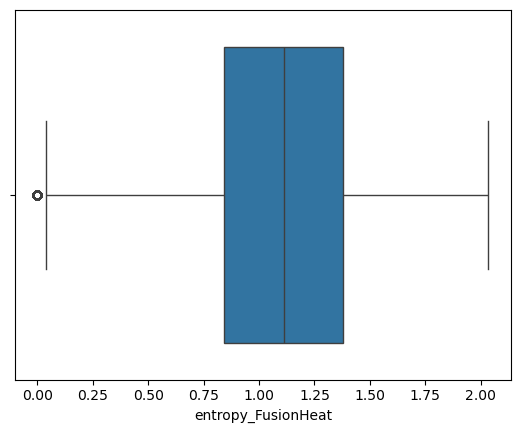

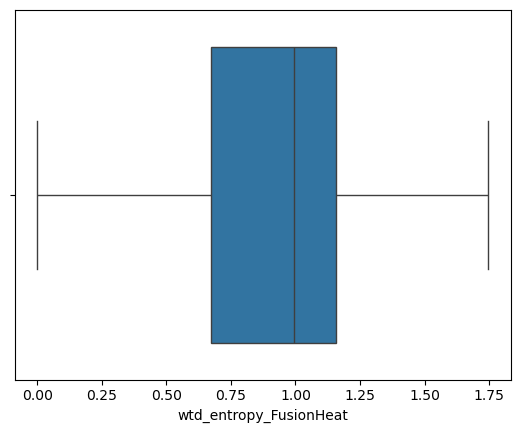

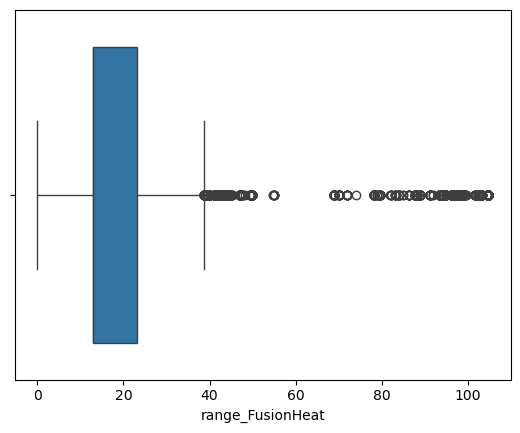

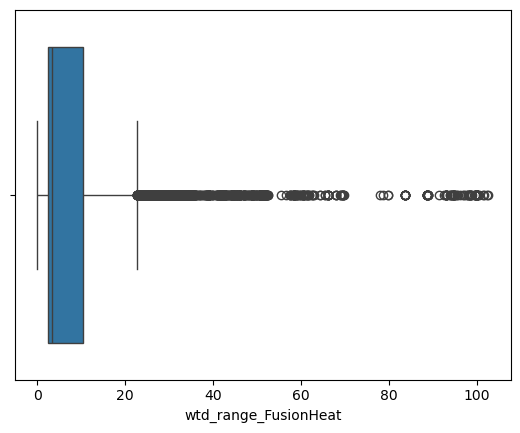

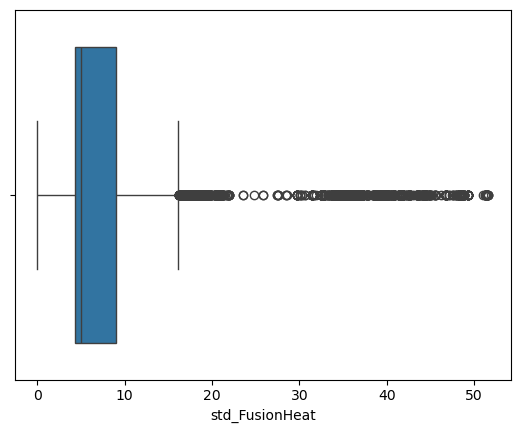

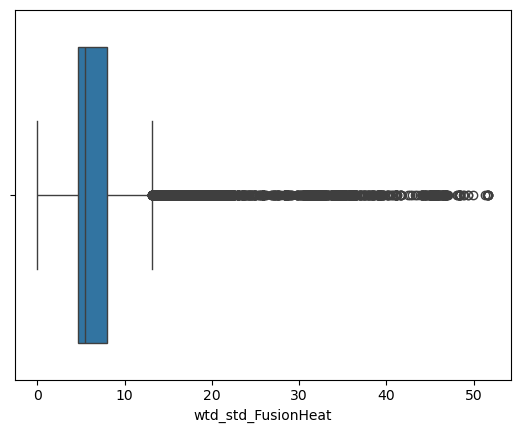

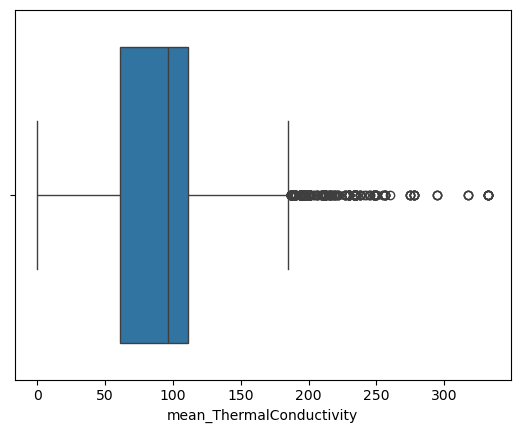

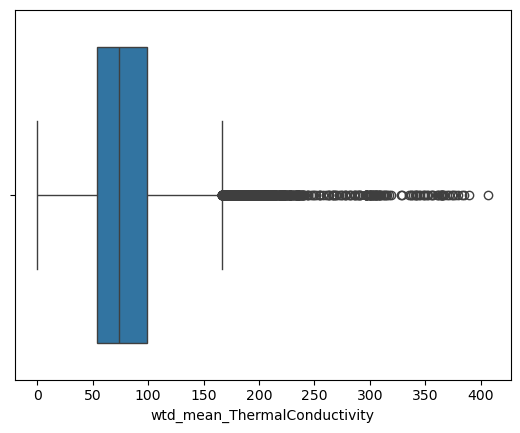

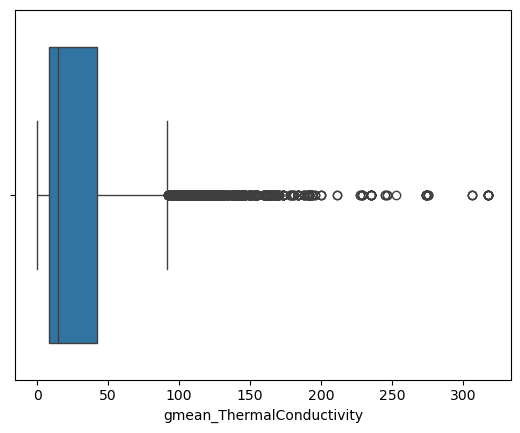

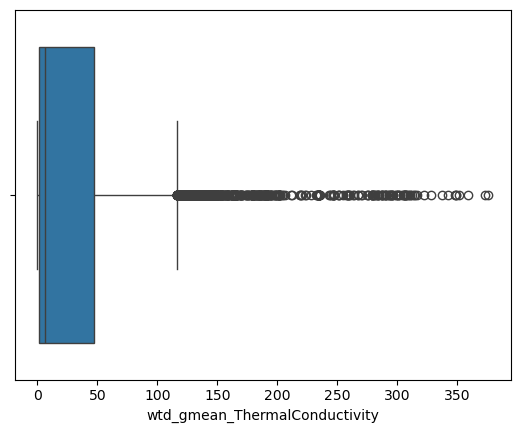

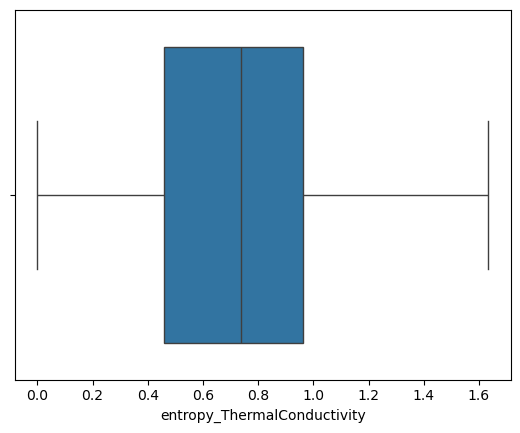

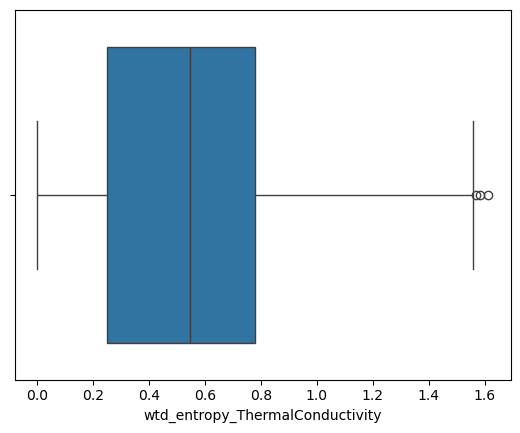

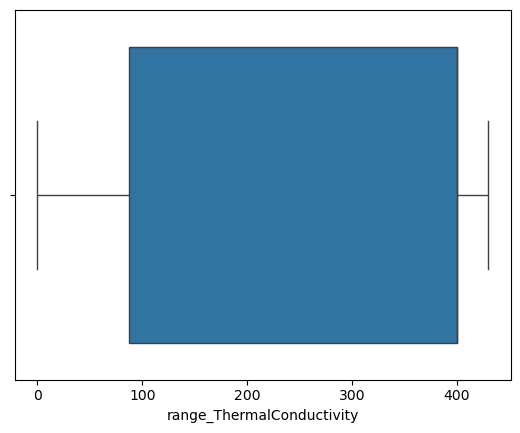

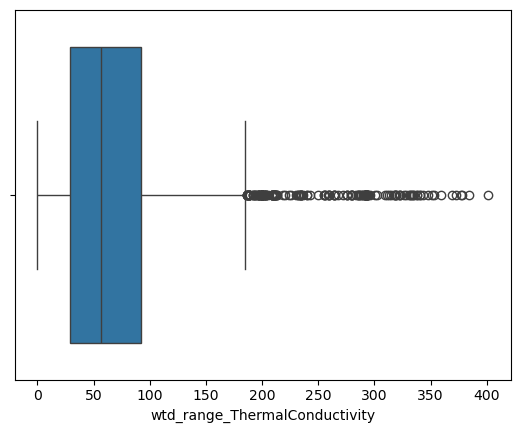

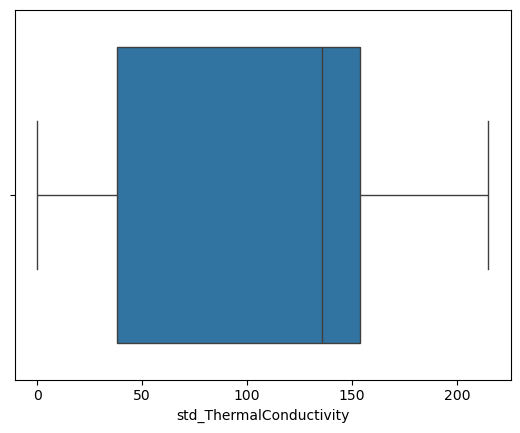

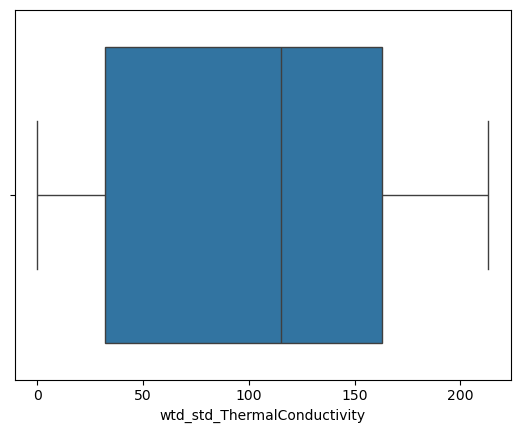

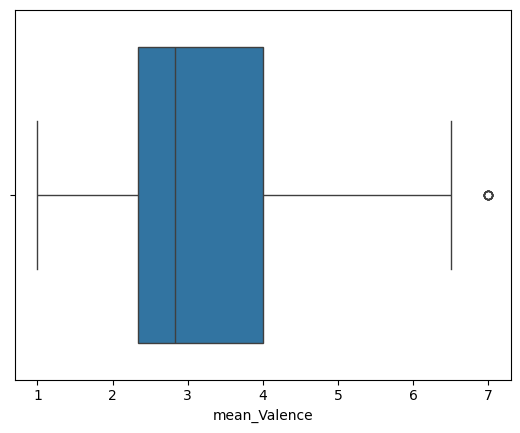

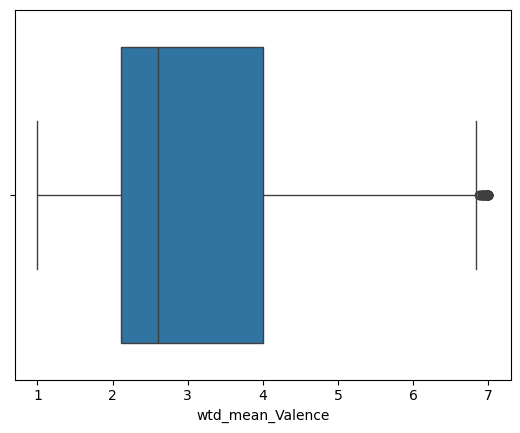

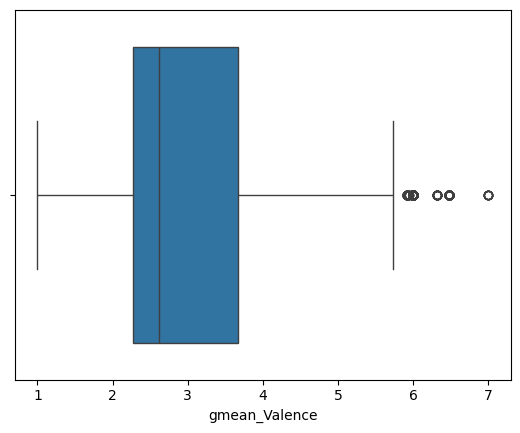

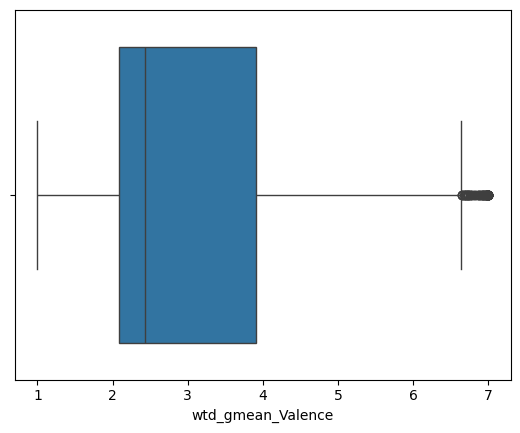

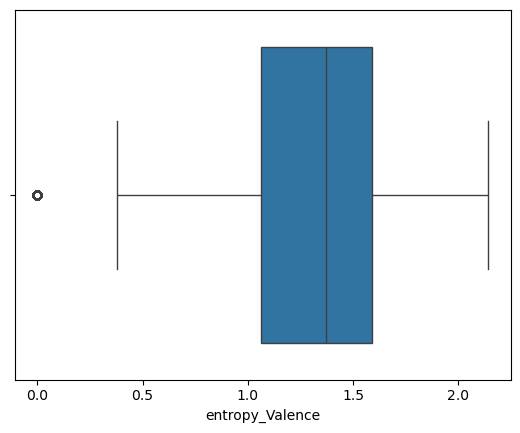

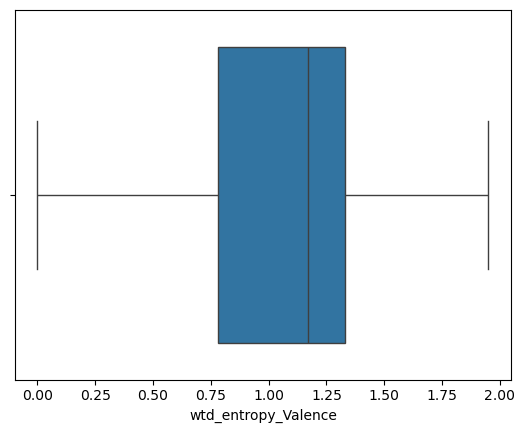

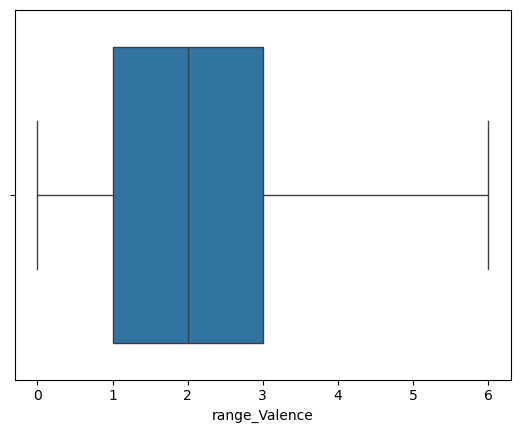

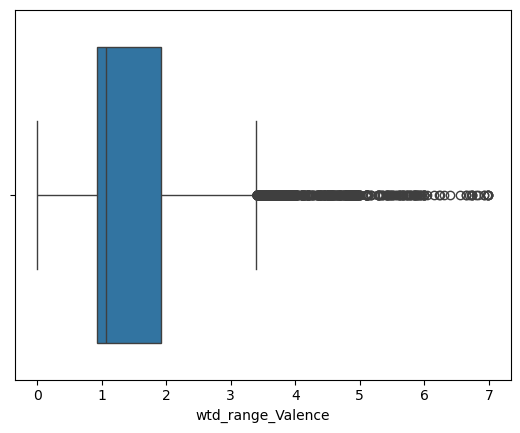

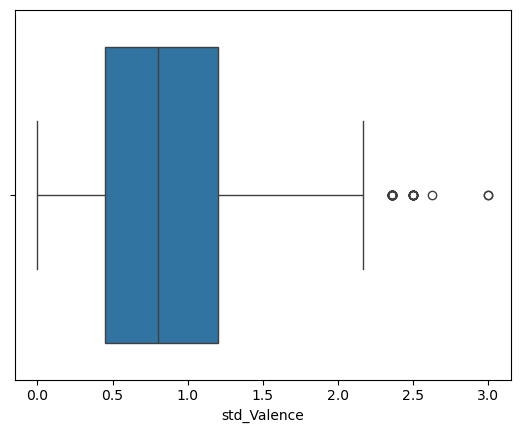

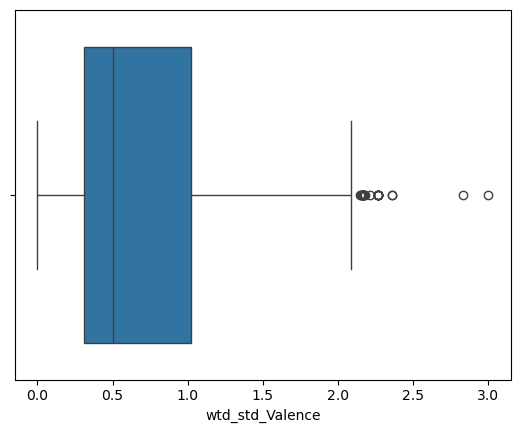

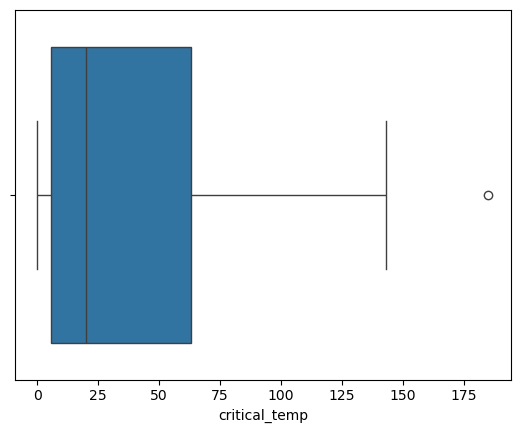

In [31]:
for i in num_columns.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [32]:
def Outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Lower_bound = Q1 - (1.5 * IQR)
        Upper_bound = Q3 + (1.5 * IQR)

        # Capping outliers
        df[col]=df[col].apply(lambda x: Lower_bound if x < Lower_bound else Upper_bound if x > Upper_bound else x)

    return df

In [33]:
df2=Outliers(df1)

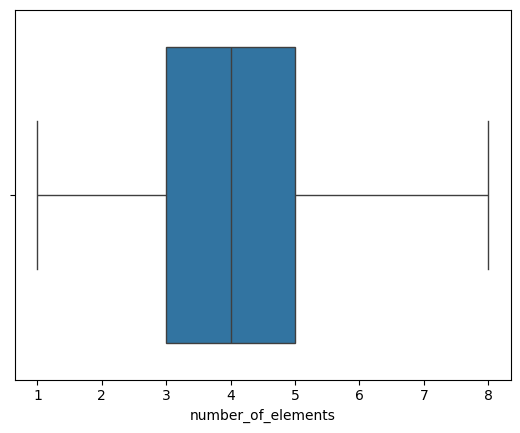

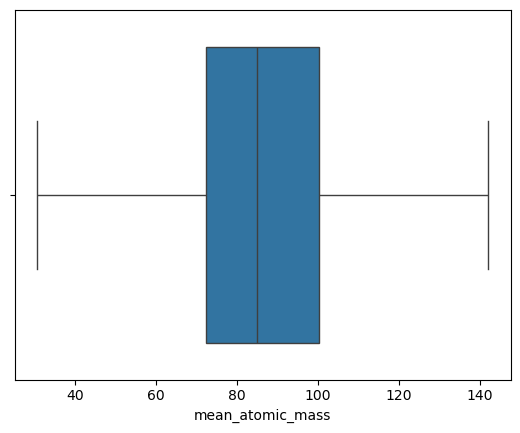

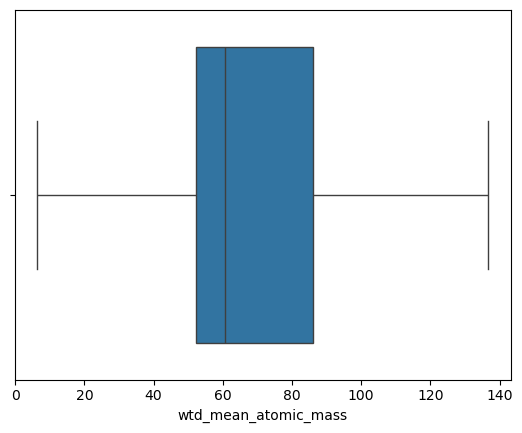

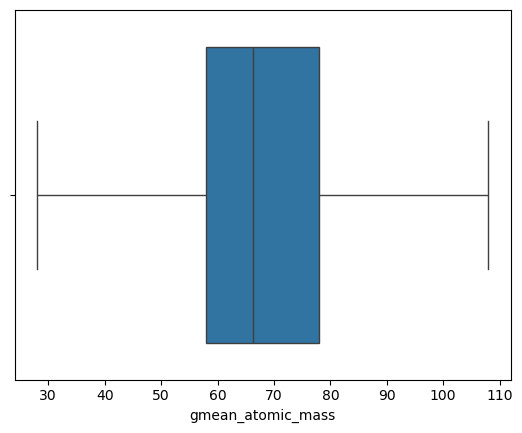

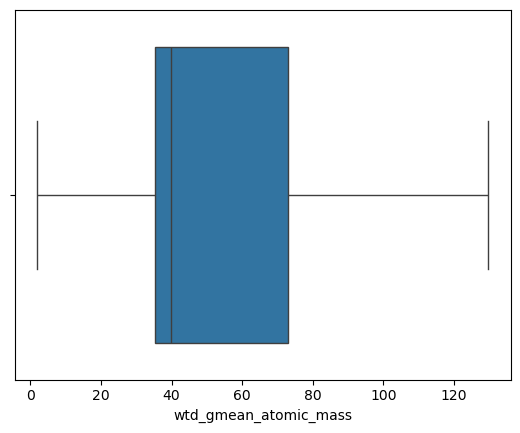

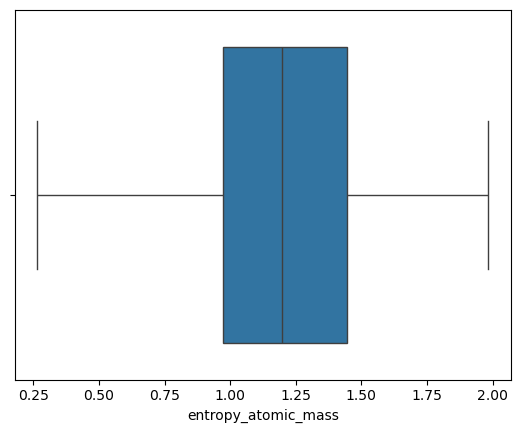

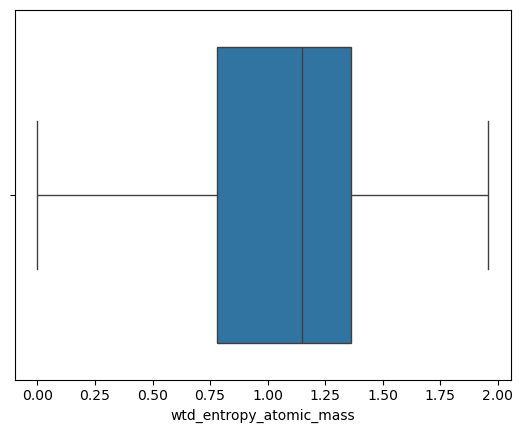

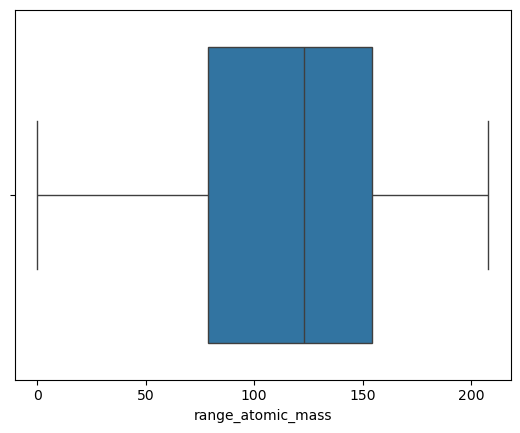

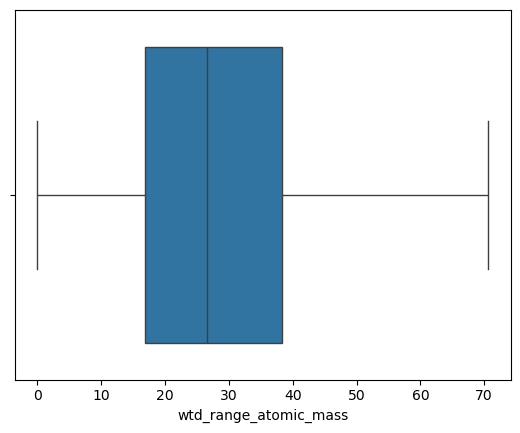

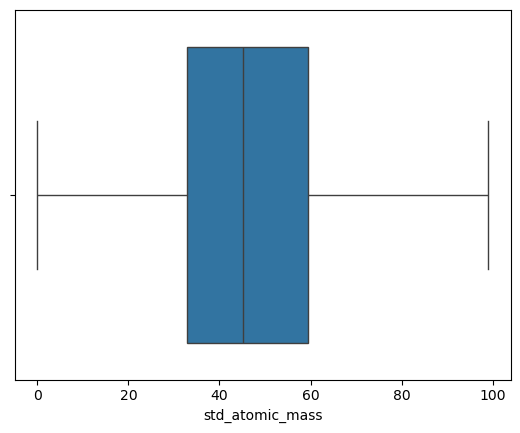

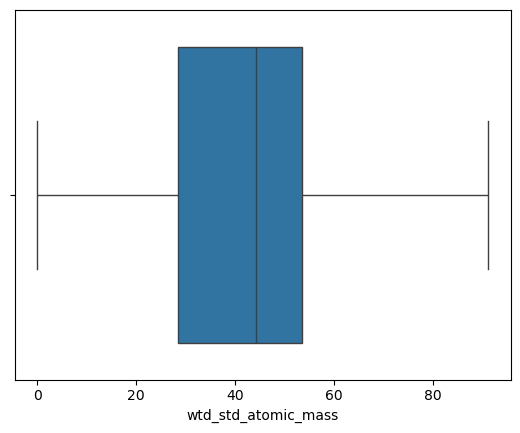

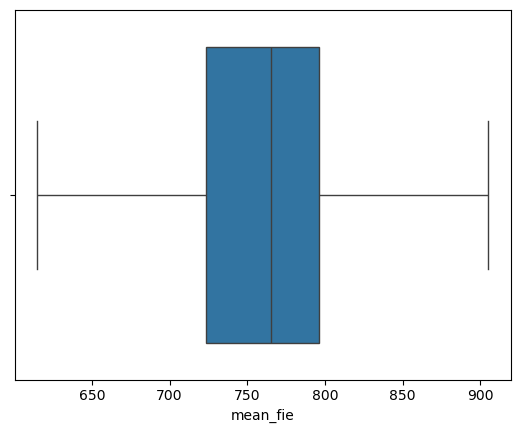

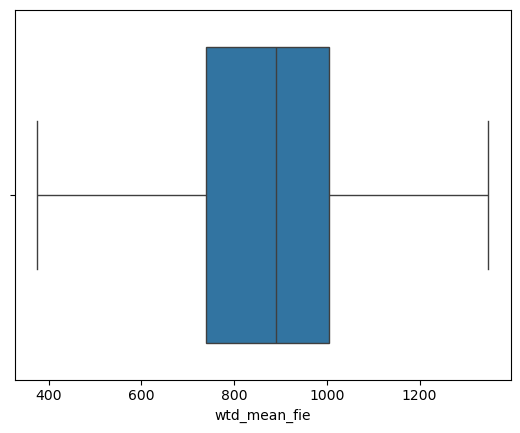

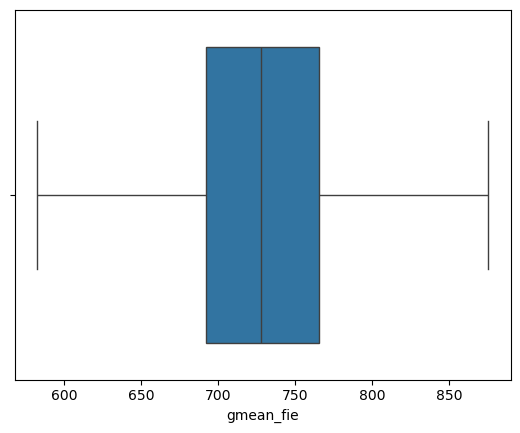

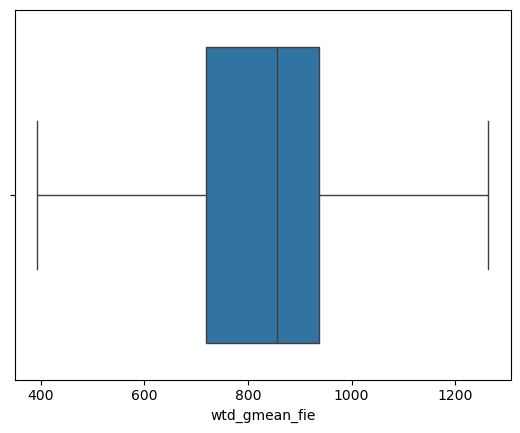

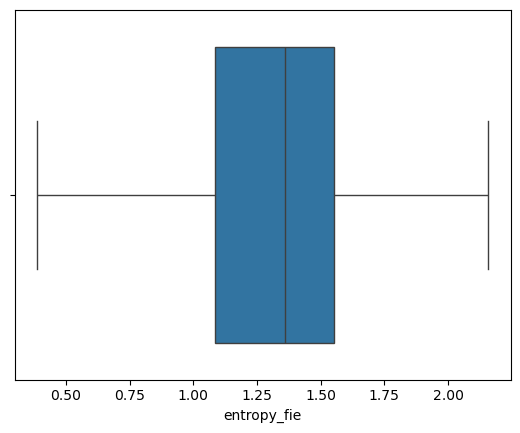

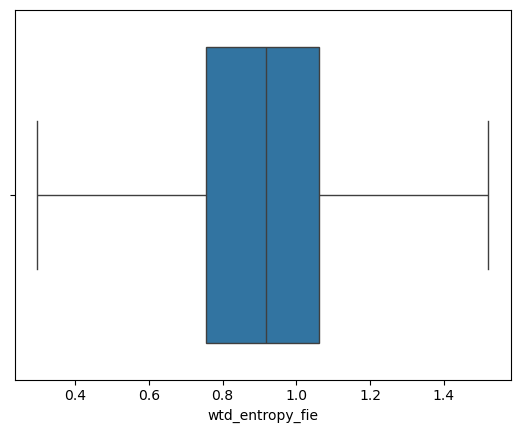

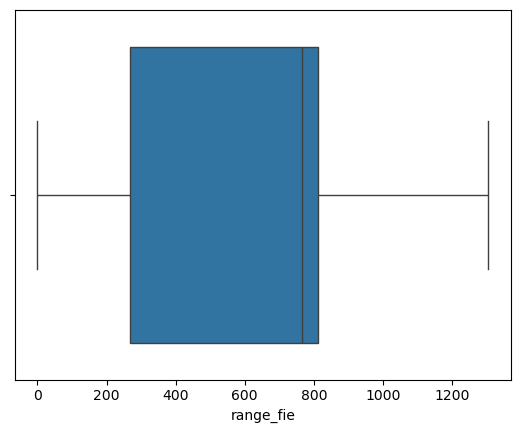

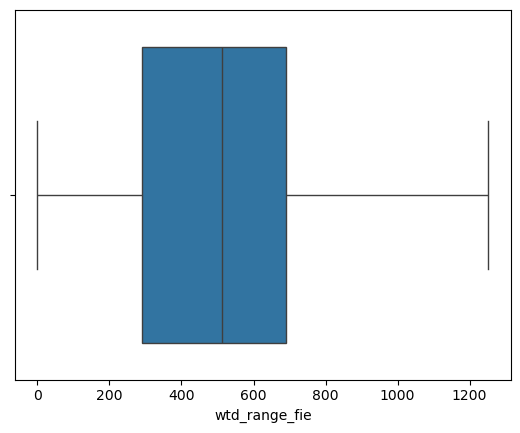

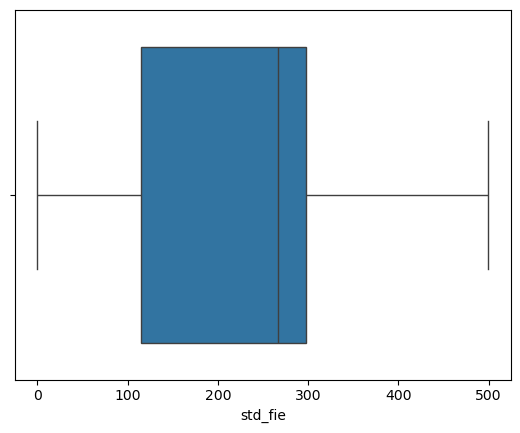

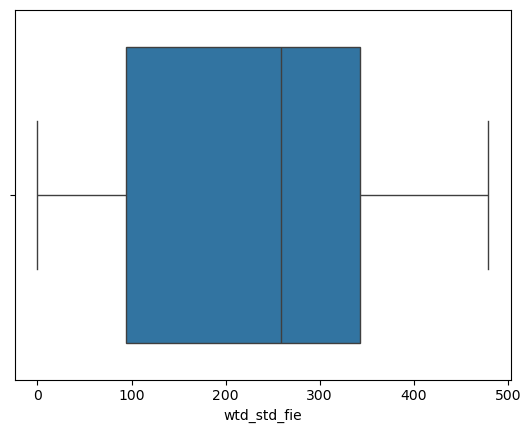

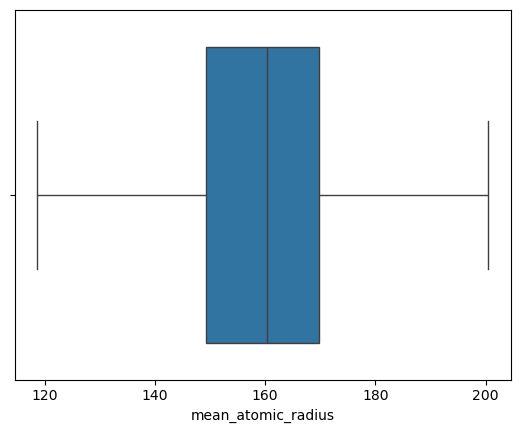

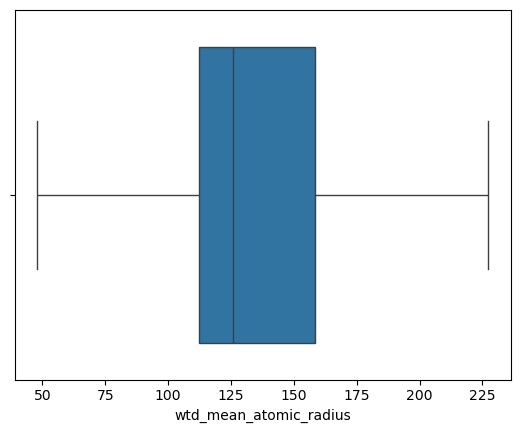

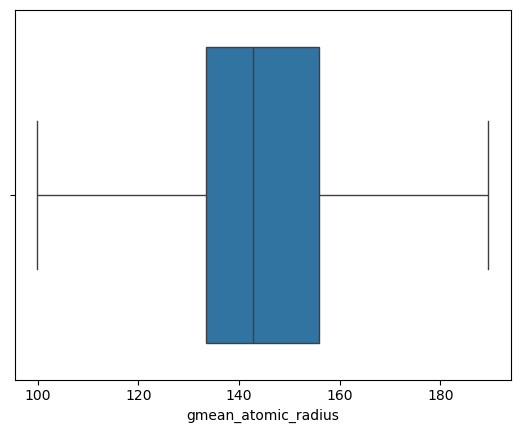

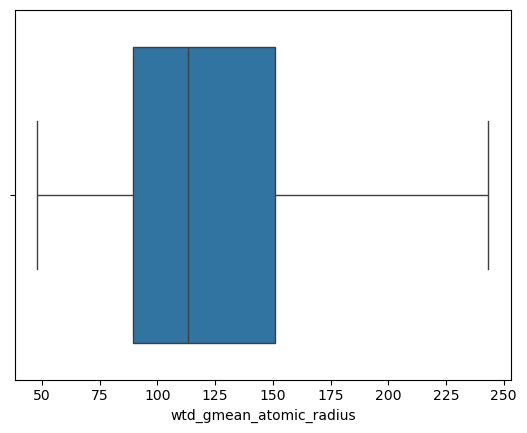

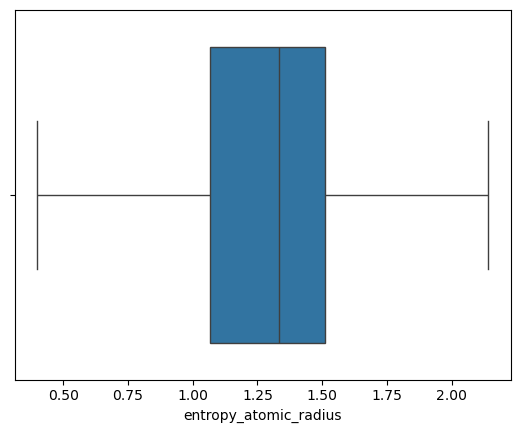

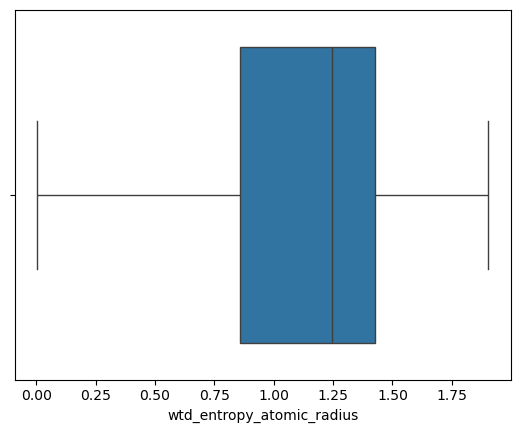

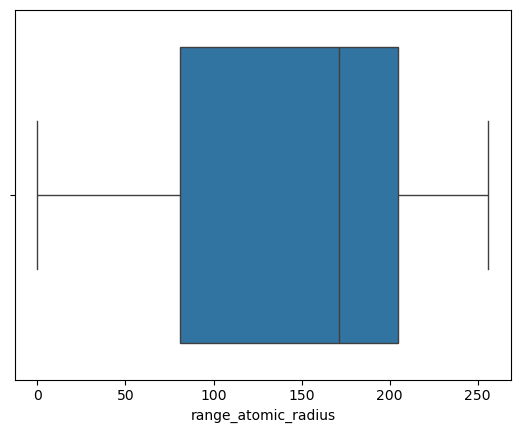

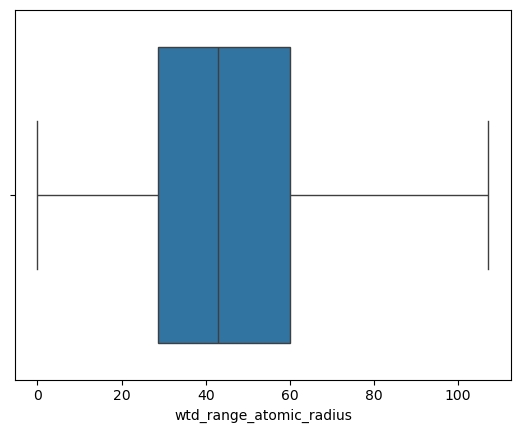

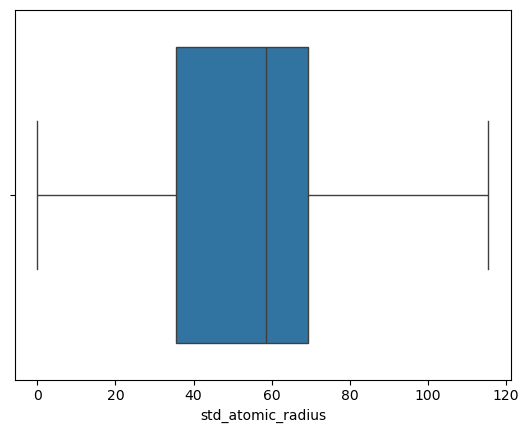

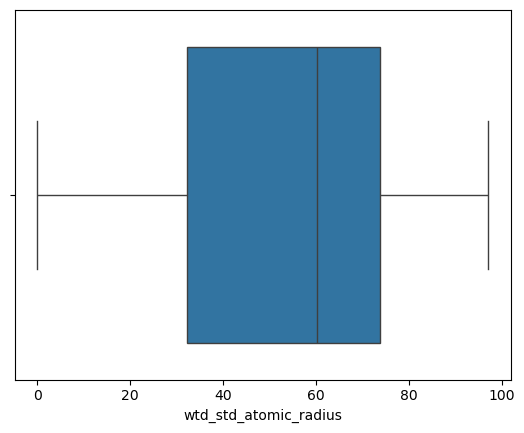

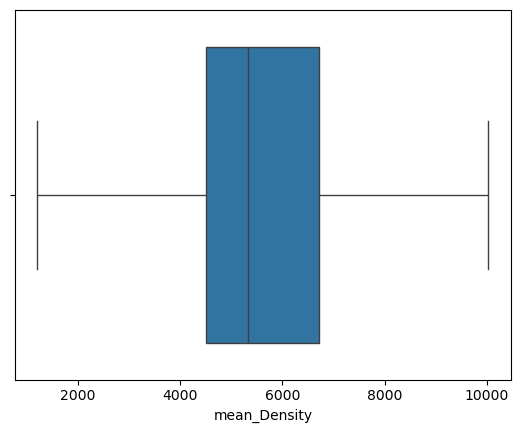

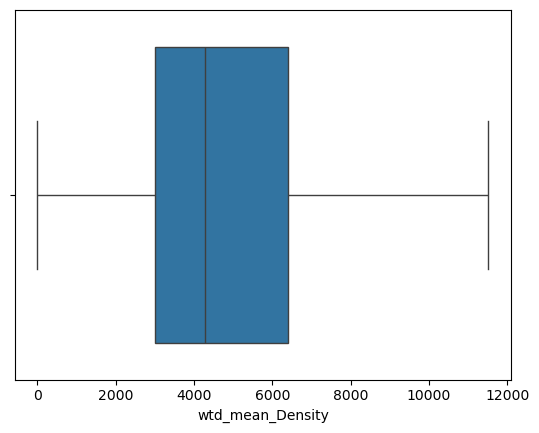

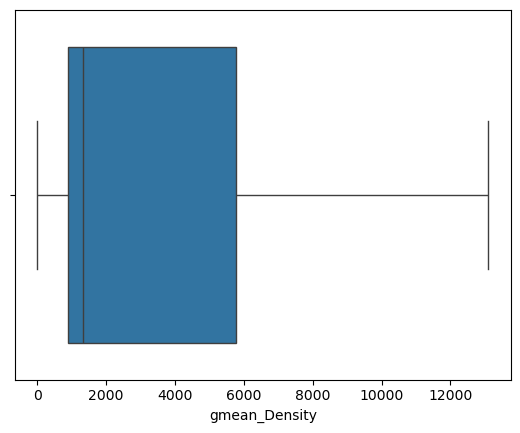

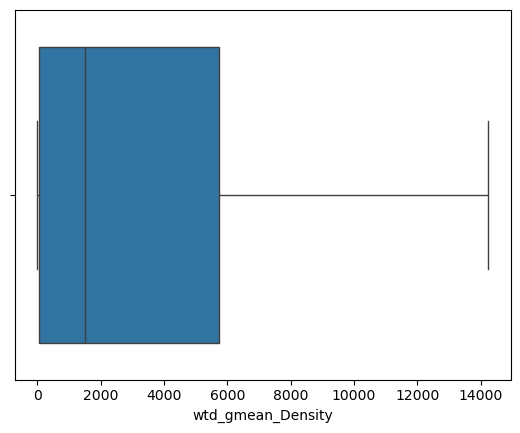

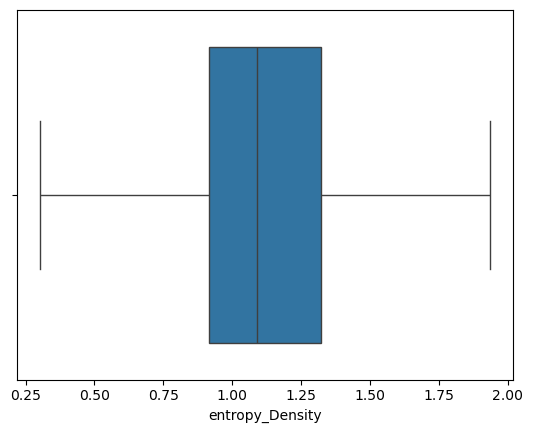

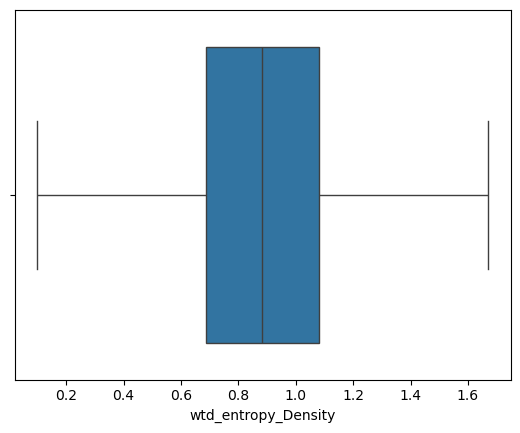

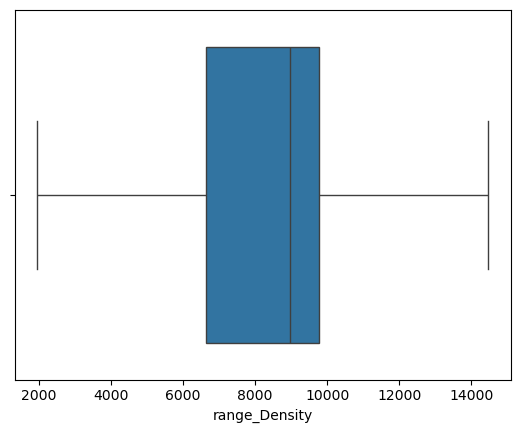

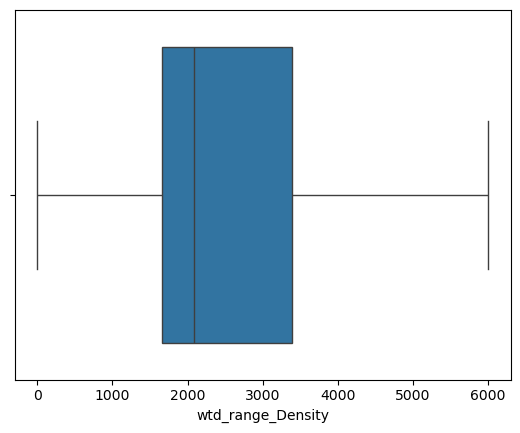

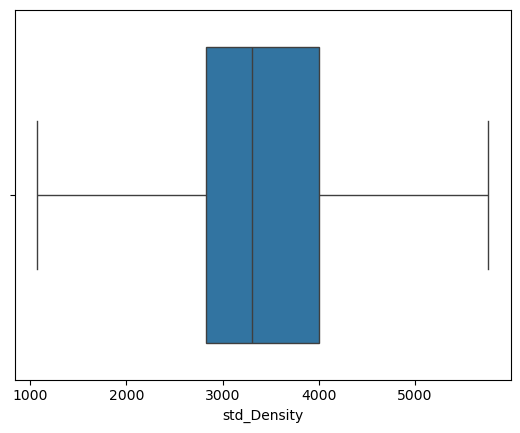

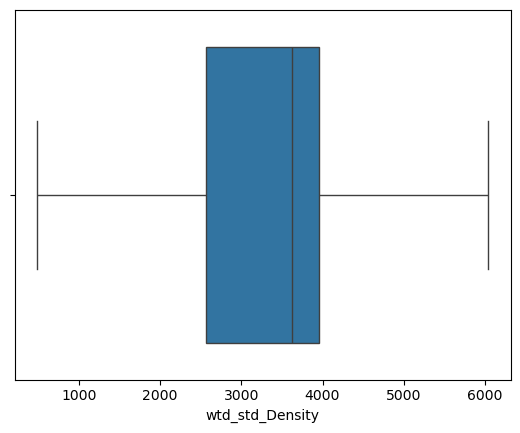

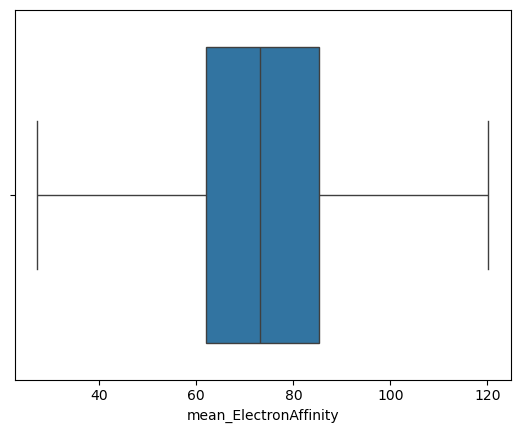

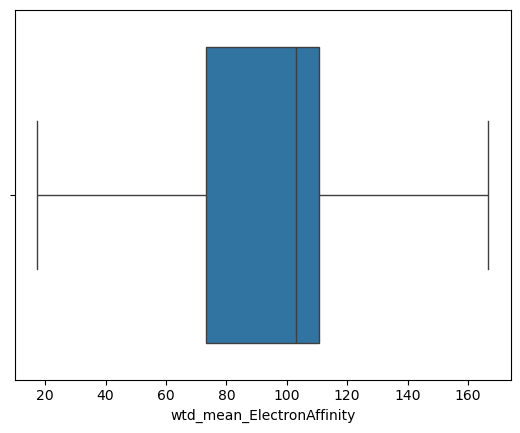

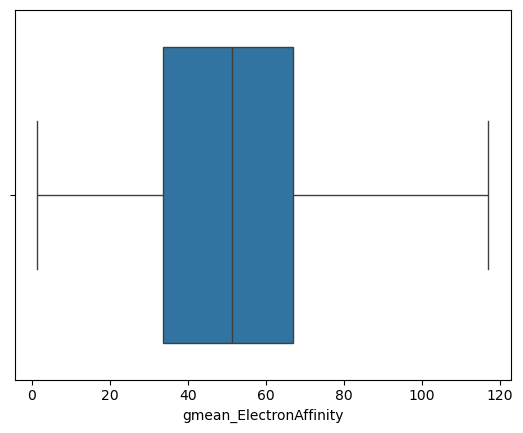

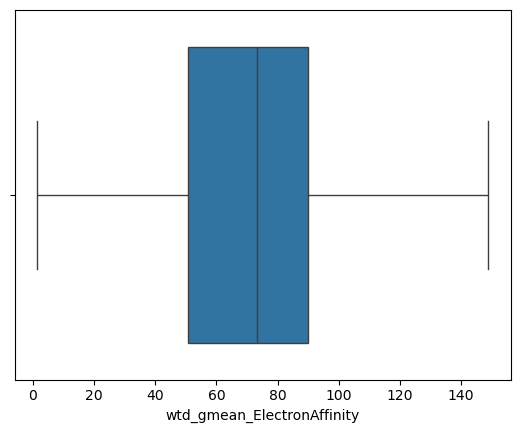

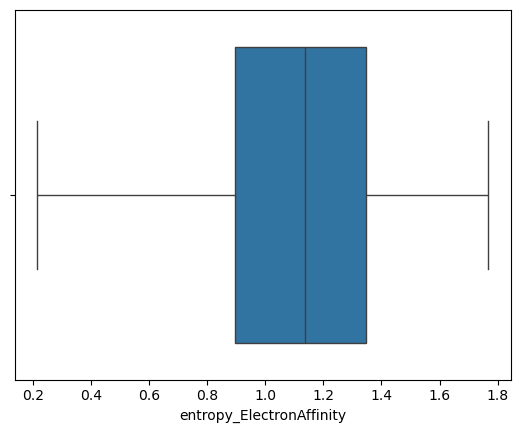

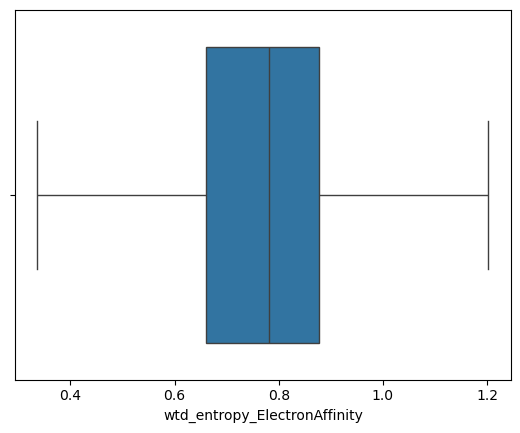

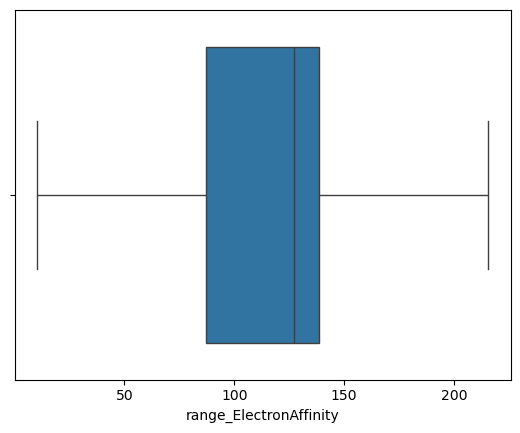

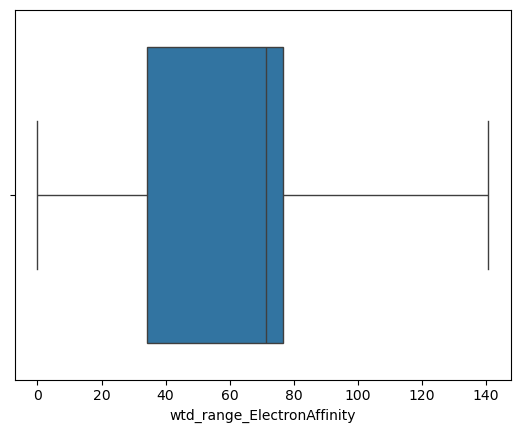

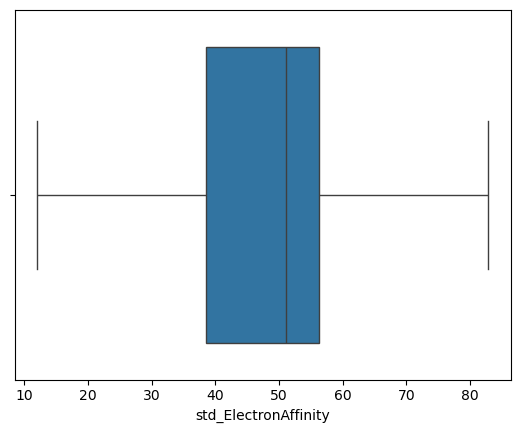

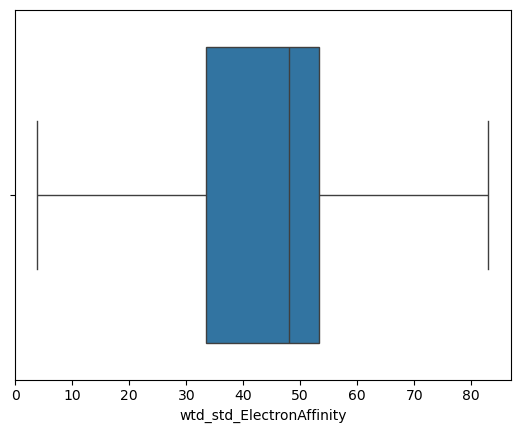

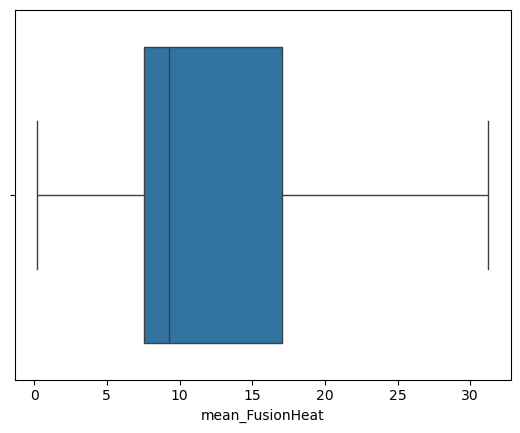

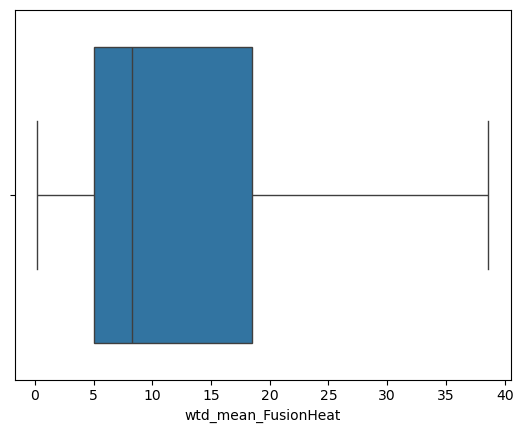

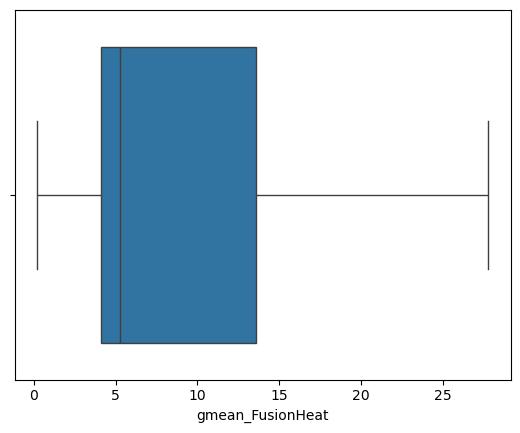

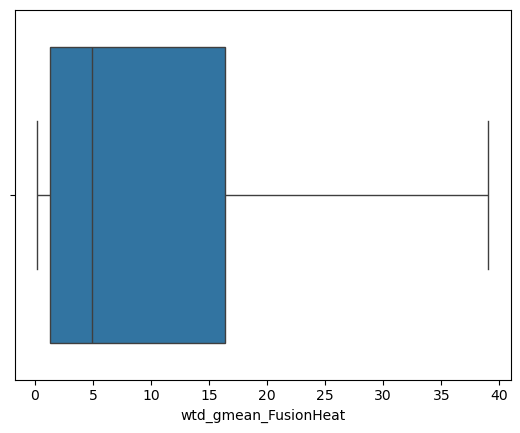

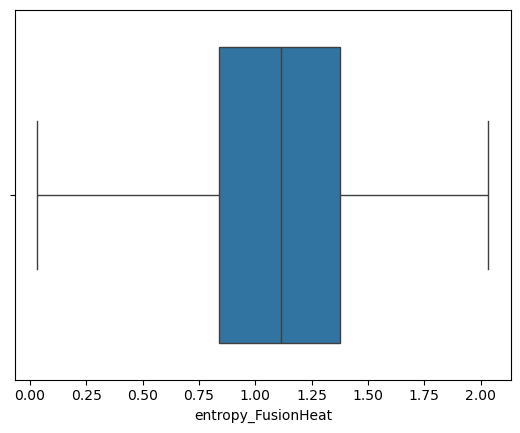

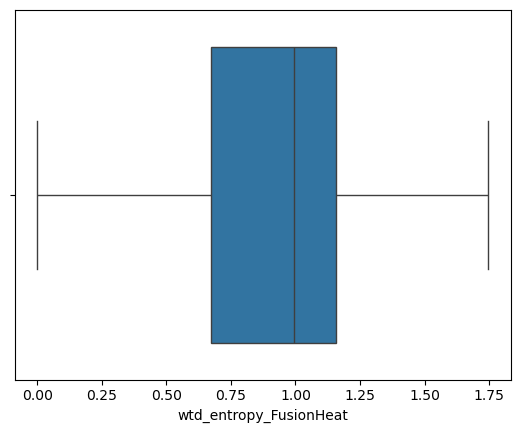

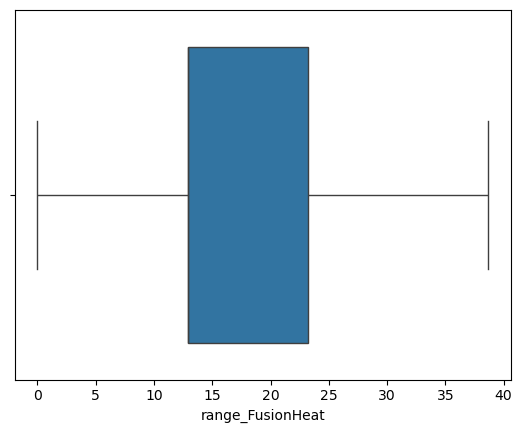

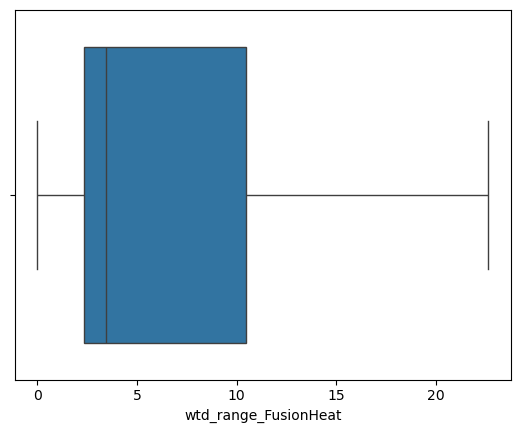

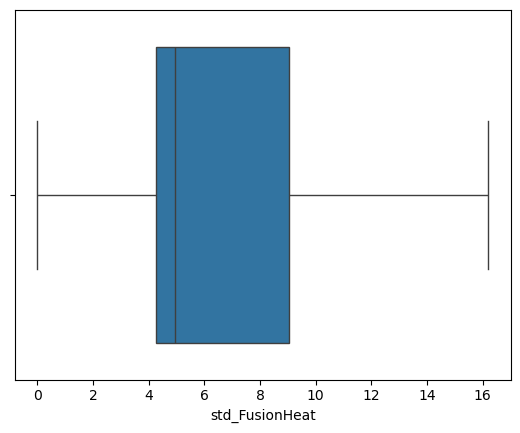

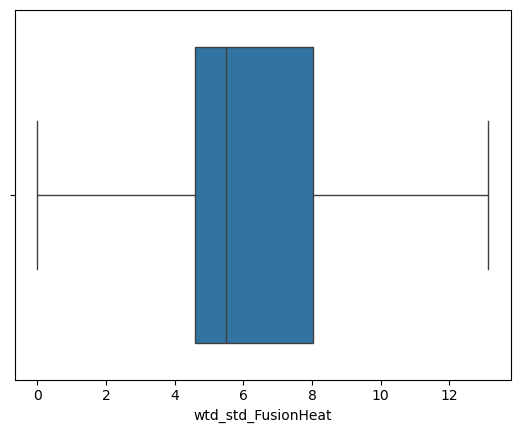

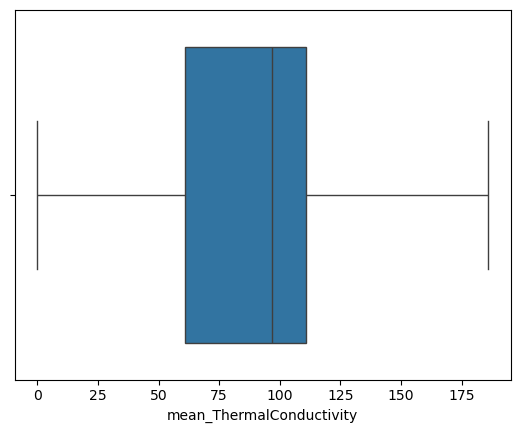

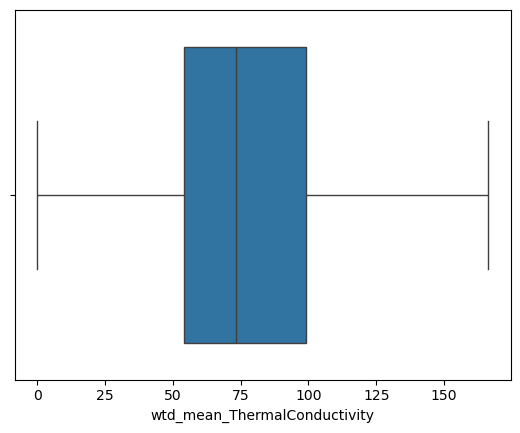

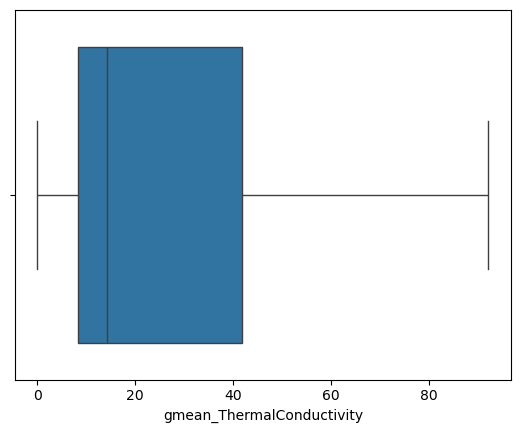

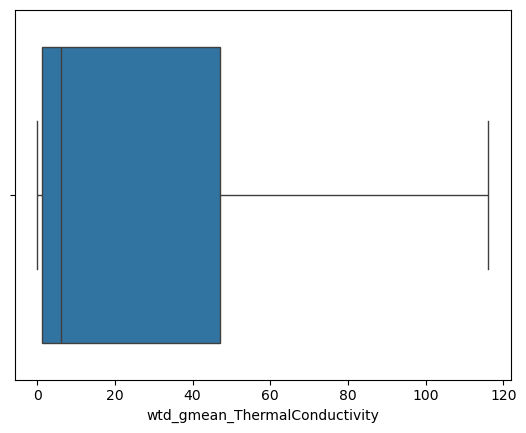

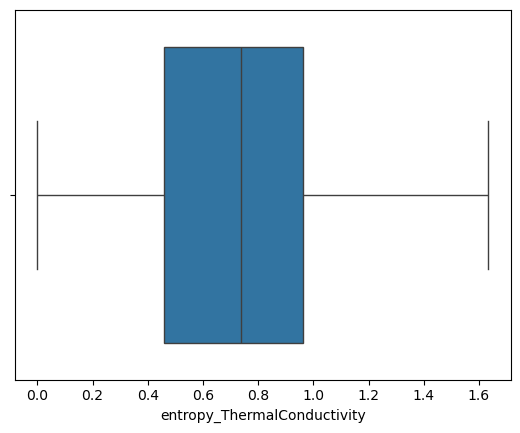

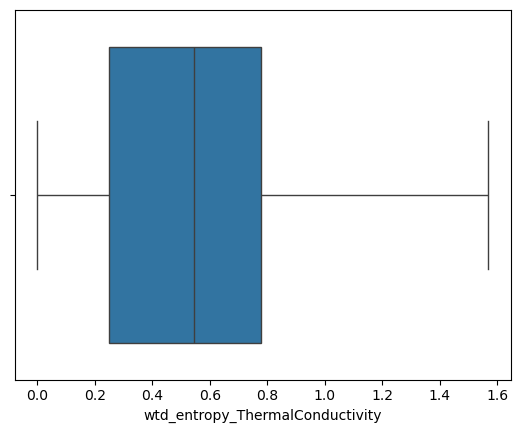

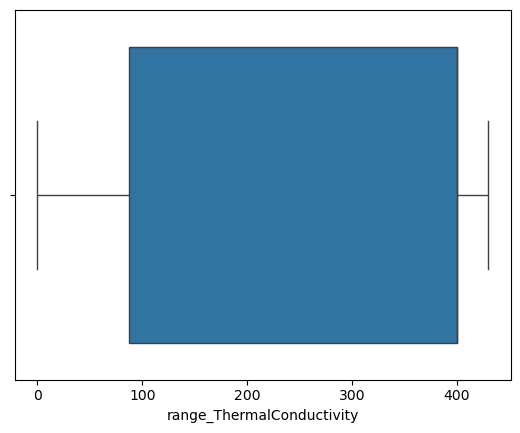

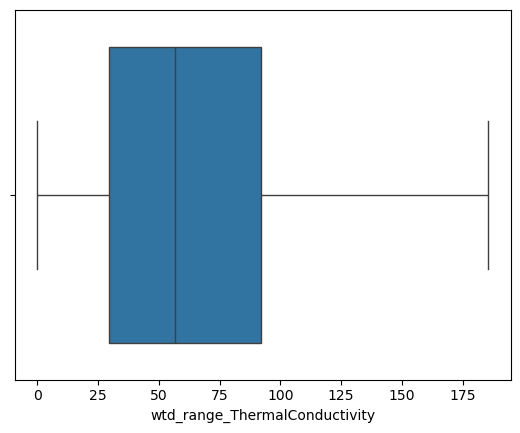

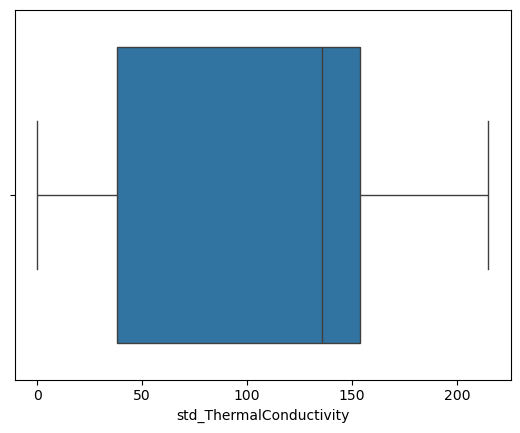

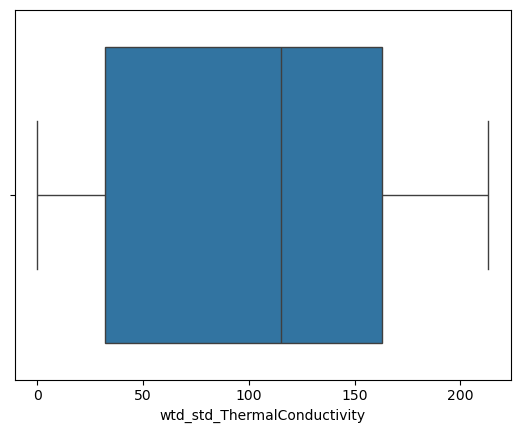

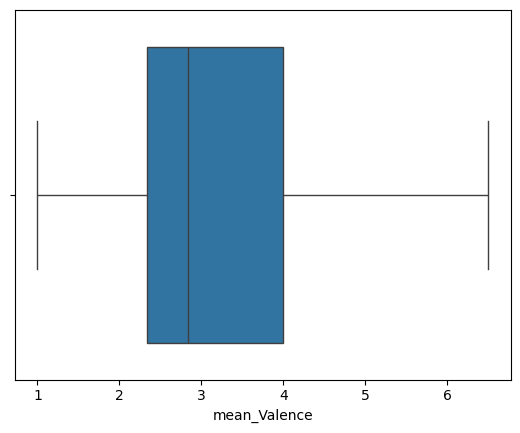

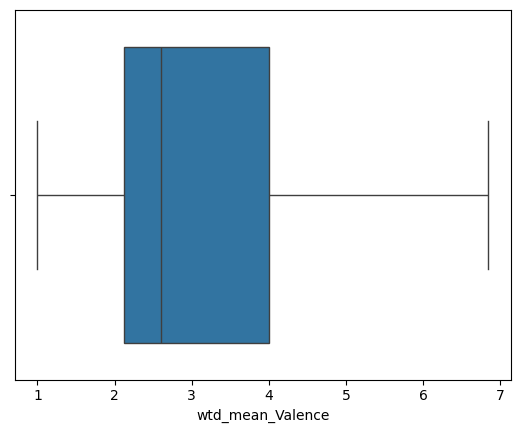

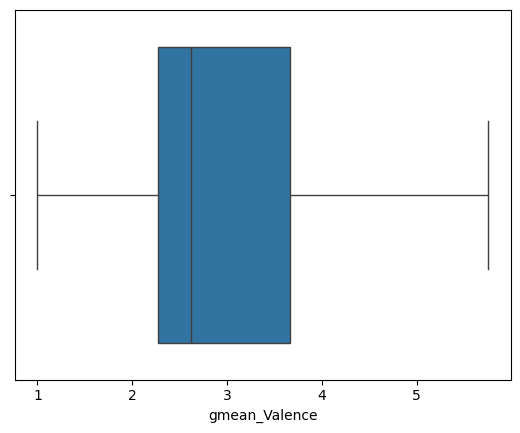

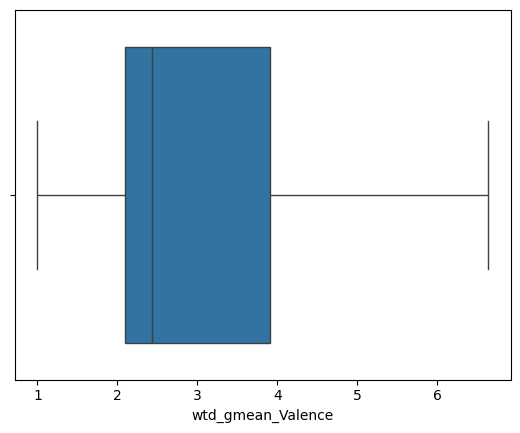

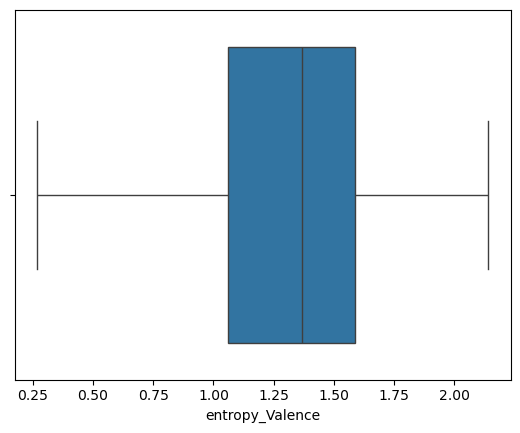

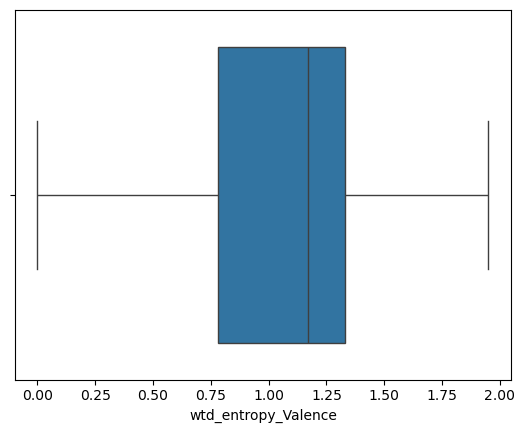

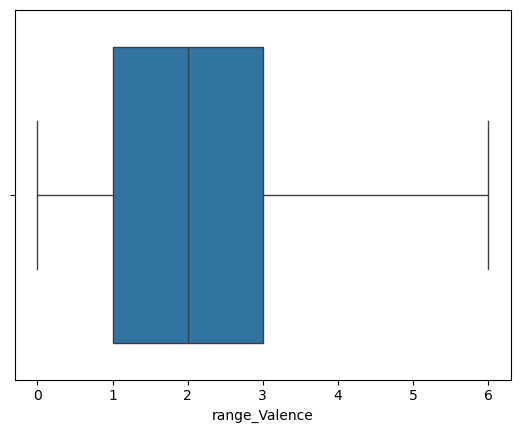

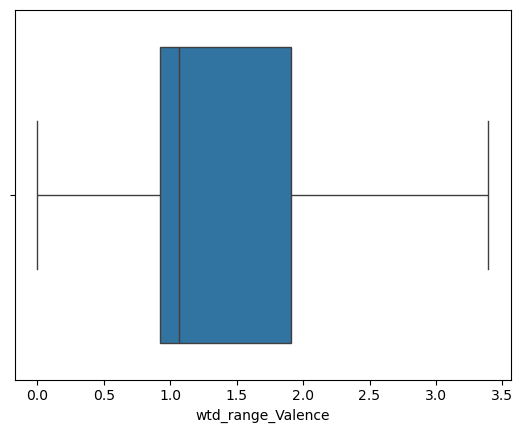

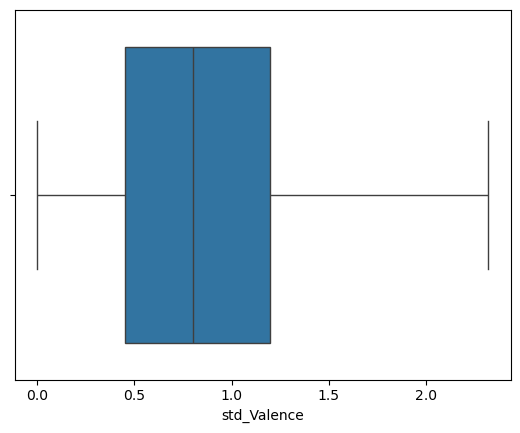

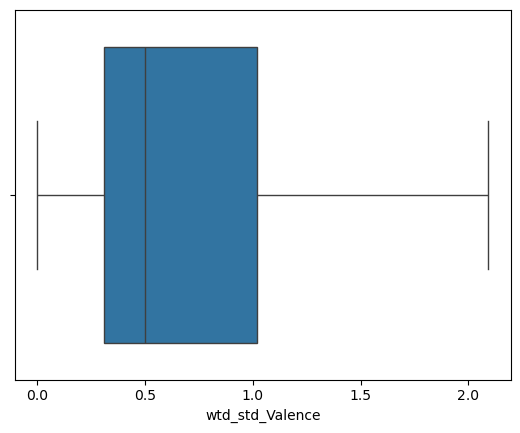

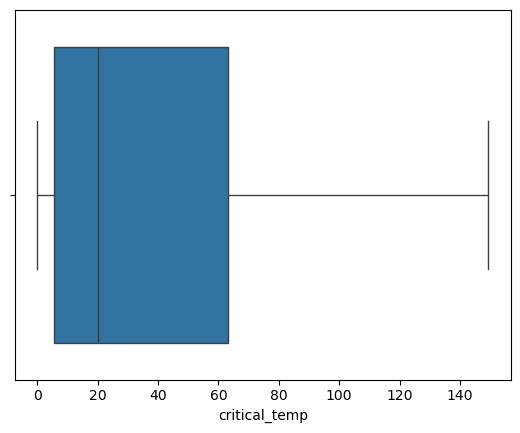

In [34]:
for i in num_columns.columns:
    sns.boxplot(data=df2,x=i)
    plt.show()

In [38]:
df2.skew()

number_of_elements      -0.006686
mean_atomic_mass         0.238592
wtd_mean_atomic_mass     0.775944
gmean_atomic_mass        0.274809
wtd_gmean_atomic_mass    1.075224
                           ...   
range_Valence            0.467163
wtd_range_Valence        1.066129
std_Valence              0.430518
wtd_std_Valence          0.643303
critical_temp            0.854317
Length: 82, dtype: float64

In [41]:
pt=PowerTransformer(method = 'yeo-johnson')

In [43]:
numerical_features=df2.select_dtypes(include=['float64', 'int64']).columns

In [45]:
df2[numerical_features]=pt.fit_transform(df2[numerical_features])

In [46]:
df2[numerical_features]

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-0.065942,0.126552,-0.385565,-0.019725,-0.589768,-0.095504,-0.129456,0.132042,0.230730,0.368219,...,-0.752594,-0.928947,-0.704166,0.056481,-0.103188,-0.805145,-0.249851,-0.818586,-0.404263,0.297606
1,0.621509,0.271084,-0.359438,0.292696,-0.575102,0.790703,-0.141715,0.132042,0.448849,0.120898,...,-0.752594,-1.729337,-0.720987,0.641479,-0.157170,0.092109,-0.184148,-0.345764,-0.318669,0.208964
2,-0.065942,0.126552,-0.384664,-0.019725,-0.589458,-0.095504,-0.352337,0.132042,0.428455,0.368219,...,-0.728302,-0.928947,-0.680573,0.056481,-0.207793,-0.805145,-0.205836,-0.818586,-0.383306,-0.035802
3,-0.065942,0.126552,-0.385115,-0.019725,-0.589613,-0.095504,-0.234312,0.132042,0.331112,0.368219,...,-0.740413,-0.928947,-0.692352,0.056481,-0.152615,-0.805145,-0.227736,-0.818586,-0.393561,0.076786
4,-0.065942,0.126552,-0.386467,-0.019725,-0.590078,-0.095504,0.050755,0.132042,0.019662,0.368219,...,-0.777167,-0.928947,-0.727894,0.056481,-0.017005,-0.805145,-0.294741,-0.818586,-0.427070,0.111554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,-0.065942,0.802712,-0.580750,0.709424,-0.252195,-0.109549,0.406061,0.570626,-0.767702,1.074184,...,0.688515,0.529230,0.779676,0.082538,-0.516943,-0.805145,0.990299,-0.818586,-0.244007,-1.265134
21259,0.621509,0.253498,-0.755588,-0.092727,-0.768668,0.353827,1.419530,1.329216,-1.491119,1.252922,...,-1.143694,-1.024669,-1.065939,0.765181,0.745045,-0.805145,-0.550248,-0.901627,-1.096631,1.634633
21260,-1.495169,0.532372,0.911780,1.421267,1.260506,-1.336736,-1.323933,-1.875317,1.182351,-1.855278,...,1.334202,1.374211,1.394390,-1.503222,-1.508915,-0.805145,1.706340,-0.654471,-0.508157,-1.351497
21261,-1.495169,0.532372,0.956255,1.421267,1.288932,-1.336736,-1.110121,-1.875317,0.195396,-1.855278,...,1.291733,1.374211,1.353898,-1.503222,-1.274811,-0.805145,1.025026,-0.654471,-0.335057,-1.380024


In [47]:
df2[numerical_features].skew()

number_of_elements      -0.071642
mean_atomic_mass         0.009027
wtd_mean_atomic_mass     0.042693
gmean_atomic_mass       -0.018058
wtd_gmean_atomic_mass   -0.000500
                           ...   
range_Valence           -0.033536
wtd_range_Valence       -0.011222
std_Valence             -0.010309
wtd_std_Valence          0.026776
critical_temp           -0.081885
Length: 82, dtype: float64

In [48]:
df3=df2[numerical_features]

In [69]:
# Correlation
correlation = df3.iloc[:, :30].corr()

In [71]:
correlation

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius
number_of_elements,1.000000,-0.087048,-0.263076,-0.189808,-0.344805,0.963368,0.895792,0.684497,-0.175193,0.511540,...,0.731538,-0.028084,-0.390152,-0.236847,-0.491576,0.993840,0.928379,0.771949,-0.240879,0.612353
mean_atomic_mass,-0.087048,1.000000,0.772338,0.916724,0.654930,-0.038277,-0.014515,0.220316,0.339283,0.296233,...,-0.180455,0.518982,0.357385,0.572529,0.299737,-0.062881,-0.060438,-0.202293,0.070237,-0.257442
wtd_mean_atomic_mass,-0.263076,0.772338,1.000000,0.769157,0.946103,-0.211772,-0.314930,-0.034080,0.641019,0.041809,...,-0.418171,0.308834,0.712148,0.469867,0.676638,-0.234938,-0.295889,-0.433064,0.312695,-0.466484
gmean_atomic_mass,-0.189808,0.916724,0.769157,1.000000,0.754099,-0.061045,-0.086575,-0.048492,0.304486,-0.002739,...,-0.317836,0.583640,0.463527,0.698341,0.418367,-0.148990,-0.172006,-0.349625,0.130303,-0.414560
wtd_gmean_atomic_mass,-0.344805,0.654930,0.946103,0.754099,1.000000,-0.245143,-0.364121,-0.238371,0.575286,-0.174484,...,-0.544613,0.327782,0.814329,0.534453,0.796107,-0.306985,-0.392646,-0.543208,0.383691,-0.575475
entropy_atomic_mass,0.963368,-0.038277,-0.211772,-0.061045,-0.245143,1.000000,0.889340,0.539760,-0.178090,0.346884,...,0.664755,0.076281,-0.316036,-0.104580,-0.420513,0.973385,0.884439,0.699831,-0.200938,0.525103
wtd_entropy_atomic_mass,0.895792,-0.014515,-0.314930,-0.086575,-0.364121,0.889340,1.000000,0.625121,-0.426341,0.468170,...,0.732273,0.078144,-0.417427,-0.141919,-0.524381,0.889772,0.960687,0.763094,-0.439128,0.624974
range_atomic_mass,0.684497,0.220316,-0.034080,-0.048492,-0.238371,0.539760,0.625121,1.000000,0.017521,0.959926,...,0.622621,-0.030387,-0.329894,-0.220973,-0.421649,0.664283,0.704286,0.660555,-0.248780,0.578164
wtd_range_atomic_mass,-0.175193,0.339283,0.641019,0.304486,0.575286,-0.178090,-0.426341,0.017521,1.000000,0.086901,...,-0.295088,0.052320,0.480873,0.177675,0.467533,-0.163136,-0.329626,-0.298635,0.672879,-0.292050
std_atomic_mass,0.511540,0.296233,0.041809,-0.002739,-0.174484,0.346884,0.468170,0.959926,0.086901,1.000000,...,0.497740,-0.027234,-0.257116,-0.185672,-0.330149,0.487667,0.543020,0.535170,-0.188164,0.490291


Text(0.5, 1.0, 'Heatmap representation of correlation of Superconductivity Data')

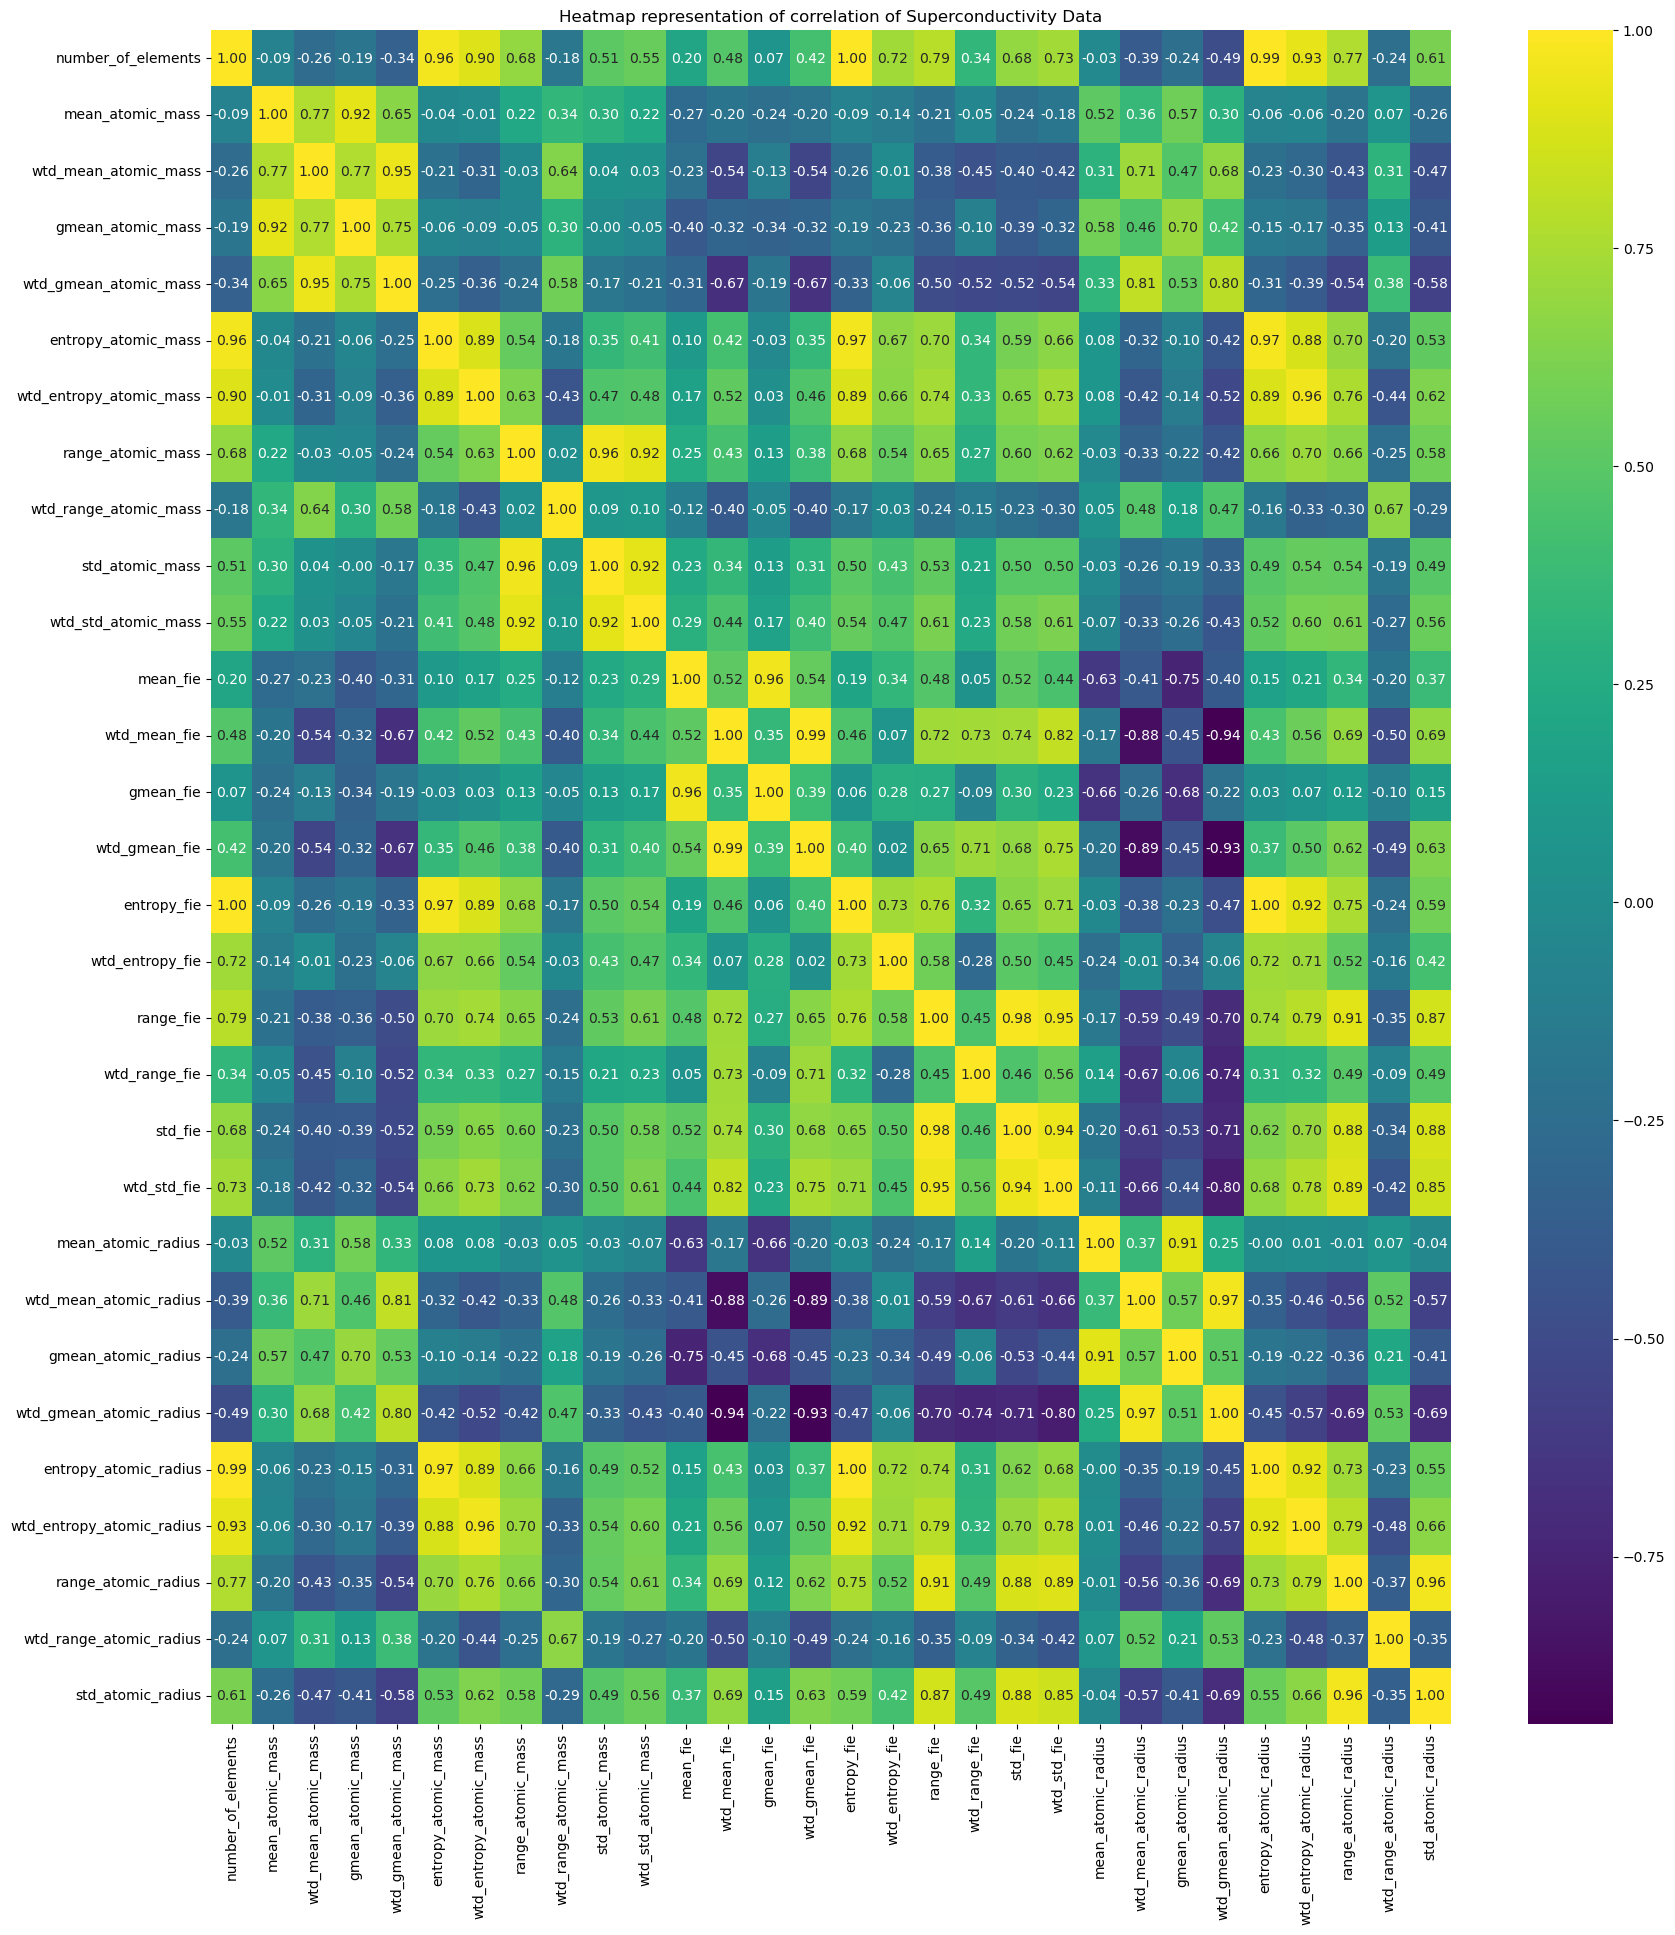

In [73]:
plt.figure(figsize = (20,22))
sns.heatmap(correlation , annot = True , fmt = '.2f',cmap = 'viridis')
plt.title('Heatmap representation of correlation of Superconductivity Data')

In [75]:
X = df3.drop('critical_temp',axis=1)
y = df3['critical_temp']

In [77]:
sk=SelectKBest(score_func=f_regression,k=30)
X_new=sk.fit_transform(X,y)

In [79]:
# Get selected features names and scores
selected_features=X.columns[sk.get_support()]
feature_scores=pd.DataFrame({'Feature':X.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)

print('Selected Features:',selected_features)
print('\nFeature Scores:')
print(feature_scores)

Selected Features: Index(['number_of_elements', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'entropy_fie', 'range_fie', 'std_fie', 'wtd_std_fie',
       'entropy_atomic_radius', 'wtd_entropy_atomic_radius',
       'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density',
       'entropy_Density', 'entropy_ElectronAffinity', 'gmean_FusionHeat',
       'wtd_gmean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat',
       'range_ThermalConductivity', 'std_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence',
       'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence',
       'wtd_entropy_Valence'],
      dtype='object')

Feature Scores:
                        Feature         Score
27          range_atomic_radius  25357.170066
70  wtd_std_ThermalConductivity  24102.426329
72             wtd_mean_Valence  23968.553989
74            wtd_gmean_Valence

In [81]:
X_selected=X[selected_features]

In [83]:
X_selected.columns

Index(['number_of_elements', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'entropy_fie', 'range_fie', 'std_fie', 'wtd_std_fie',
       'entropy_atomic_radius', 'wtd_entropy_atomic_radius',
       'range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density',
       'entropy_Density', 'entropy_ElectronAffinity', 'gmean_FusionHeat',
       'wtd_gmean_FusionHeat', 'entropy_FusionHeat', 'wtd_entropy_FusionHeat',
       'range_ThermalConductivity', 'std_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'mean_Valence', 'wtd_mean_Valence',
       'gmean_Valence', 'wtd_gmean_Valence', 'entropy_Valence',
       'wtd_entropy_Valence'],
      dtype='object')

In [85]:
# Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_selected)

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [89]:
print(f"""
X train shape : {X_train.shape}
X test shape : {X_test.shape} 
y train shape : {y_train.shape}
y test shape : {y_test.shape}
""")


X train shape : (16957, 30)
X test shape : (4240, 30) 
y train shape : (16957,)
y test shape : (4240,)



In [95]:
models={
    '1.Linear Regression':LinearRegression(),
    '2.Decision Tree Regressor':DecisionTreeRegressor(),
    '3.Random Forest Regressor':RandomForestRegressor(),
    '4.Gradient Boosting Regressor':GradientBoostingRegressor(),
    '5.Support Vector Regressor':SVR()
}

In [101]:
result={}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    r2=r2_score(y_test,y_pred)
    result[model_name]={'mae':mae,'mse':mse,'rmse':rmse,'r2':r2}

In [102]:
result_df=pd.DataFrame(result).T
result_df

,mae,mse,rmse,r2
1.Linear Regression,0.417481,0.276264,0.525608,0.725347
2.Decision Tree Regressor,0.193911,0.120594,0.347266,0.880110
3.Random Forest Regressor,0.165056,0.070485,0.265490,0.929926
4.Gradient Boosting Regressor,0.297952,0.154407,0.392947,0.846493
5.Support Vector Regressor,0.277076,0.155974,0.394936,0.844935


In [105]:
rfg = RandomForestRegressor(
    random_state=42,
    n_estimators=50,         
    max_depth=10,             
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    n_jobs=-1                
)

In [109]:
param_grid = {
    'n_estimators': [50, 100, 200,300],  
    'max_depth': [10, 20, None],     
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]   
}

In [111]:
grid_search = GridSearchCV(
    estimator=rfg,
    param_grid=param_grid,
    cv=10,  
    scoring='r2',  
    n_jobs=-1, 
    verbose=2   
)

In [113]:
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=10, max_features='sqrt',
                                             min_samples_leaf=2,
                                             min_samples_split=5,
                                             n_estimators=50, n_jobs=-1,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=2)

In [115]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R² Score: 0.9276098915884307


In [117]:
best_model=grid_search.best_estimator_
best_model

RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                      random_state=42)

In [119]:
best_model=RandomForestRegressor(max_features='sqrt',n_estimators=300,n_jobs= -1,random_state=42)

In [121]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                      random_state=42)

In [122]:
y_pred=best_model.predict(X_test)

In [125]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [127]:
print(f"mae:{mae},mse:{mse},rmse:{rmse},r2:{r2}")

mae:0.16175794449740963,mse:0.06873482984822815,rmse:0.2621732821021779,r2:0.9316660192966819
